In [ ]:
path = '/content/drive/MyDrive/SECOND_PROJECT/'

channel_path = 'CHANNEL.txt'
compet_path = 'COMPET.txt'
custdemo_path = 'CUSTDEMO.txt'
membership_path = 'MEMBERSHIP.txt'
prodcl_path = 'PRODCL.txt'
purprod_path = 'PURPRODTR.txt'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df_custdemo = pd.read_csv(path + custdemo_path, encoding = 'cp949')
df_purprodtr = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_df_purchase.csv').iloc[:, 1:]   # final purchase df로 변경함
df_class = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/upperclass_final.txt')
df_region = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/data.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/branch').iloc[:, 1:]

In [ ]:
## 구별 연령대별 이용횟수
a = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_region[['고객번호', '시군구']], on = '고객번호')
a

,고객번호,점포코드,구매금액,분기,시군구
0,2716,B7,14400,4,송파구
1,2716,B7,14400,4,송파구
2,2716,B7,14400,4,송파구
3,2716,B7,14400,4,송파구
4,2716,B7,14400,4,송파구
...,...,...,...,...,...
48751233,4594,B9,29900,8,계양구
48751234,4594,B9,29900,8,계양구
48751235,4594,B9,29900,8,계양구
48751236,4594,B9,29900,8,계양구


In [ ]:
b = pd.merge(a, df_custdemo[['고객번호', '연령대']], on = '고객번호')
b

,고객번호,점포코드,구매금액,분기,시군구,연령대
0,2716,B7,14400,4,송파구,50세~54세
1,2716,B7,14400,4,송파구,50세~54세
2,2716,B7,14400,4,송파구,50세~54세
3,2716,B7,14400,4,송파구,50세~54세
4,2716,B7,14400,4,송파구,50세~54세
...,...,...,...,...,...,...
48751233,4594,B9,29900,8,계양구,45세~49세
48751234,4594,B9,29900,8,계양구,45세~49세
48751235,4594,B9,29900,8,계양구,45세~49세
48751236,4594,B9,29900,8,계양구,45세~49세


In [ ]:
aa = b.groupby(['점포코드', '시군구', '연령대', '분기'])[['고객번호']].count().reset_index()
aa

,점포코드,시군구,연령대,분기,고객번호
0,A1,강남구,25세~29세,3,24
1,A1,강남구,25세~29세,4,2
2,A1,강남구,25세~29세,5,266
3,A1,강남구,25세~29세,6,217
4,A1,강남구,25세~29세,7,153
...,...,...,...,...,...
32833,D8,중랑구,45세~49세,7,9
32834,D8,중랑구,50세~54세,1,3
32835,D8,중랑구,50세~54세,3,15
32836,D8,중랑구,50세~54세,6,3


In [ ]:
aa = aa.query("분기 in [1, 2, 6, 7]")
aa

,점포코드,시군구,연령대,분기,고객번호
3,A1,강남구,25세~29세,6,217
4,A1,강남구,25세~29세,7,153
6,A1,강남구,30세~34세,1,173
7,A1,강남구,30세~34세,2,229
11,A1,강남구,30세~34세,6,708
...,...,...,...,...,...
32826,D8,중랑구,25세~29세,7,42
32829,D8,중랑구,30세~34세,7,12
32833,D8,중랑구,45세~49세,7,9
32834,D8,중랑구,50세~54세,1,3


In [ ]:
aa.columns = ['점포코드', '시군구', '연령대', '분기', '고객count']
aa

,점포코드,시군구,연령대,분기,고객count
3,A1,강남구,25세~29세,6,217
4,A1,강남구,25세~29세,7,153
6,A1,강남구,30세~34세,1,173
7,A1,강남구,30세~34세,2,229
11,A1,강남구,30세~34세,6,708
...,...,...,...,...,...
32826,D8,중랑구,25세~29세,7,42
32829,D8,중랑구,30세~34세,7,12
32833,D8,중랑구,45세~49세,7,9
32834,D8,중랑구,50세~54세,1,3


In [ ]:
for i in aa['점포코드'].unique():
  for j in aa['시군구'].unique():
    for l in aa['연령대'].unique():
      for m in [1, 2, 6, 7]:
        df = aa.query(f"점포코드 == '{i}' & 시군구 == '{j}' & 연령대 == '{l}' & 분기 == {m}")
        if df.empty:
          add_df = pd.DataFrame({'점포코드' : f'{i}', '시군구' : f'{j}', '연령대' : f'{l}', '분기' : f'{m}', '고객count' : 0}, index = [0])
          aa = pd.concat([aa, add_df])

In [ ]:
len(aa.query("분기 == 2")['점포코드'].unique())

162

In [ ]:
# 없는 분기에는 0으로 값 채우기
for i in aa['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = aa.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '남성_이용횟수' : 0, '남성_구매금액' : 0}, index = [0])
      aa = pd.concat([aa, add_df])

,점포코드,시군구,연령대,분기,고객count,남성_이용횟수,남성_구매금액
0,A1,강남구,25세~29세,3,24.0,NaN,NaN
1,A1,강남구,25세~29세,4,2.0,NaN,NaN
2,A1,강남구,25세~29세,5,266.0,NaN,NaN
3,A1,강남구,25세~29세,6,217.0,NaN,NaN
4,A1,강남구,25세~29세,7,153.0,NaN,NaN
...,...,...,...,...,...,...,...
0,C434,NaN,NaN,4,NaN,0.0,0.0
0,C434,NaN,NaN,5,NaN,0.0,0.0
0,C434,NaN,NaN,6,NaN,0.0,0.0
0,C508,NaN,NaN,5,NaN,0.0,0.0


# 점포 지역 살펴보기

In [ ]:
len(df_stores)

636

## 시도별

In [ ]:
# 점포코드 제휴사 합치기
df_purprodtr['점포코드'] = df_purprodtr['점포코드'].astype(str)
df_purprodtr['점포코드'] = df_purprodtr['제휴사'] + df_purprodtr['점포코드']

# 전체 분기 다 있는 점포들만 남김
df_stores.columns = ['점포코드']
df_purprodtr = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액']], df_stores, on = '점포코드')

# 고객번호로 거주지역 합치기
df_purprodtr = pd.merge(df_purprodtr, df_region[['고객번호', '시도', '시군구']], on = '고객번호')

# 추정점포위치 분포 (시도) - 점포마다 거주지역별 고객 count
a = df_purprodtr.groupby(['점포코드', '시도'])[['고객번호']].count().reset_index()

# a에서 점포마다 고객 count 최대인 거주지역 
b = a.groupby(['점포코드'])[['고객번호']].max().reset_index()

# b에 거주지역만 추가하기
ab_result = pd.merge(a, b, on = ['점포코드', '고객번호'])

In [ ]:
 len(ab_result)

636

In [ ]:
ab_result.groupby(['시도']).count()

,점포코드,고객번호
시도,,
강원도,10,10
경기도,206,206
경상남도,27,27
경상북도,16,16
광주광역시,22,22
대구광역시,22,22
대전광역시,15,15
부산광역시,38,38
서울특별시,168,168


## 구별(서울만) - 위 168개 매장만 추려서(구 살펴보기)

In [ ]:
# 서울에 위치하는 것으로 추정되는 점포들의 목록
seoul_store = pd.DataFrame({'점포코드' : [x for x in ab_result.query("시도 == '서울특별시'").점포코드]})

# 서울위치점포들만 남기기(추정)
df_purprodtr = pd.merge(df_purprodtr, seoul_store, on = '점포코드')

# 필요한 칼럼만 남기고 정리
df_purprodtr = df_purprodtr[['고객번호', '점포코드', '구매금액', '시군구']]

# 점포코드마다 시군구 별로 고객번호 이용횟수 count
c = df_purprodtr.groupby(['점포코드', '시군구'])[['고객번호']].count().reset_index()

# c에서 이용횟수 가장 많은 시군구만 점포마다 뽑기
d = c.groupby(['점포코드'])[['고객번호']].max().reset_index()

# cd 합치기
cd_final = pd.merge(c, d, on = ['점포코드', '고객번호'])
cd_final

,점포코드,시군구,고객번호
0,A1,김포시,532425
1,A12,강남구,1788753
2,A2,송파구,4965304
3,A20,노원구,2386083
4,A24,강북구,253367
...,...,...,...
163,D4,김포시,340
164,D5,김포시,1053
165,D6,강북구,1688
166,D7,성동구,5962


In [ ]:
len(cd_final)

168

In [ ]:
check_store = [x for x in cd_final.query("시군구 == ['기장군', '김포시', '유성구', '함양군']")['점포코드']]
check_store

['A1',
 'A39',
 'A9',
 'C228',
 'C240',
 'C40',
 'C427',
 'C469',
 'C486',
 'D1',
 'D11',
 'D13',
 'D2',
 'D4',
 'D5',
 'D8']

In [ ]:
c.query("점포코드 == 'D8'").sort_values('고객번호', ascending = False)

,점포코드,시군구,고객번호
2680,D8,김포시,982
2686,D8,중랑구,923
2682,D8,동대문구,244
2675,D8,강남구,154
2685,D8,중구,70
2683,D8,성북구,41
2684,D8,송파구,20
2679,D8,기장군,16
2678,D8,광진구,14
2681,D8,노원구,12


In [ ]:
cd_final.groupby('시군구')[['고객번호']].count()

,고객번호
시군구,
강남구,14
강동구,3
강북구,6
강서구,10
관악구,3
광진구,6
구로구,2
금천구,3
기장군,2


In [ ]:
import numpy as np

cd_final['시군구'] = np.where(cd_final['점포코드'] == 'A1', '서대문구',
                           np.where(cd_final['점포코드'] == 'A39', '용산구',
                                    np.where(cd_final['점포코드'] == 'A9', '영등포구',
                                             np.where(cd_final['점포코드'] == 'D8', '중랑구',
                                                      np.where(cd_final['점포코드'] == 'D5', '강남구',
                                                               np.where(cd_final['점포코드'] == 'C469', '금천구',
                                                                        np.where(cd_final['점포코드'] == 'C486', '강남구',
                                                                                 np.where(cd_final['점포코드'] == 'D1', '마포구',
                                                                                          np.where(cd_final['점포코드'] == 'D11', '광진구',
                                                                                                   np.where(cd_final['점포코드'] == 'D2', '마포구',
                                                                                                            np.where(cd_final['점포코드'] == 'D4', '강북구', cd_final['시군구'])))))))))))

In [ ]:
for i, store in enumerate(cd_final['점포코드']):
  if store in ['C228', 'C240', 'C40', 'C427', 'D13']:
    cd_final['점포코드'][i] = np.NaN

<ipython-input-13-63a53ed59c7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_final['점포코드'][i] = np.NaN


In [ ]:
cd_final.dropna(inplace = True)

In [ ]:
cd_final[['점포코드', '시군구']].to_csv('final_store_list.csv')

In [ ]:
pd.read_csv('final_store_list.csv').iloc[:, 1:].set_index('점포코드').to_csv('final_store_sql.csv')

- 서울 추정 점포로 1차 
- 위 점포들 중에서 시군구로 묶어서 살펴봄

['A1',
 'A12',
 'A2',
 'A20',
 'A24',
 'A26',
 'A3',
 'A39',
 'A5',
 'A9',
 'B1',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B3',
 'B4',
 'B41',
 'B6',
 'B7',
 'B8',
 'B9',
 'C1',
 'C104',
 'C108',
 'C109',
 'C11',
 'C113',
 'C114',
 'C115',
 'C119',
 'C121',
 'C124',
 'C127',
 'C128',
 'C129',
 'C13',
 'C130',
 'C133',
 'C139',
 'C14',
 'C141',
 'C142',
 'C143',
 'C145',
 'C146',
 'C15',
 'C154',
 'C162',
 'C163',
 'C164',
 'C168',
 'C174',
 'C176',
 'C178',
 'C179',
 'C18',
 'C181',
 'C185',
 'C187',
 'C19',
 'C191',
 'C193',
 'C195',
 'C20',
 'C203',
 'C209',
 'C211',
 'C212',
 'C213',
 'C215',
 'C218',
 'C22',
 'C225',
 'C228',
 'C231',
 'C236',
 'C240',
 'C242',
 'C246',
 'C253',
 'C256',
 'C283',
 'C294',
 'C300',
 'C303',
 'C306',
 'C308',
 'C310',
 'C312',
 'C317',
 'C318',
 'C319',
 'C325',
 'C330',
 'C331',
 'C34',
 'C342',
 'C343',
 'C35',
 'C356',
 'C361',
 'C37',
 'C40',
 'C401',
 'C402',
 'C406',
 'C412',
 'C427',
 'C434',
 'C469',
 'C471',
 'C473',
 'C474',
 'C475',
 'C476',
 'C477',
 'C478',
 'C479',
 'C48',
 'C482',
 'C483',
 'C484',
 'C486',
 'C487',
 'C489',
 'C490',
 'C491',
 'C495',
 'C496',
 'C499',
 'C500',
 'C504',
 'C506',
 'C508',
 'C513',
 'C519',
 'C522',
 'C531',
 'C532',
 'C535',
 'C539',
 'C540',
 'C557',
 'C561',
 'C571',
 'C573',
 'C69',
 'C74',
 'C89',
 'C95',
 'C96',
 'C97',
 'C99',
 'D1',
 'D10',
 'D11',
 'D12',
 'D13',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8']

## 서울만 X 그냥 전체 다 두고 시군구로 봤을 때 --> 결과 의미 없음 신경쓰지말기

In [ ]:
# 점포코드 제휴사 합치기
df_purprodtr['점포코드'] = df_purprodtr['점포코드'].astype(str)
df_purprodtr['점포코드'] = df_purprodtr['제휴사'] + df_purprodtr['점포코드']

# 전체 분기 다 있는 점포들만 남김
df_stores.columns = ['점포코드']
df_purprodtr = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액']], df_stores, on = '점포코드')

# 고객번호로 거주지역 합치기
df_purprodtr = pd.merge(df_purprodtr, df_region[['고객번호', '시군구']], on = '고객번호')

# 추정점포위치 분포 (시도) - 점포마다 거주지역별 고객 count
e = df_purprodtr.groupby(['점포코드', '시군구'])[['고객번호']].count().reset_index()

# a에서 점포마다 고객 count 최대인 거주지역 
f = a.groupby(['점포코드'])[['고객번호']].max().reset_index()

# b에 거주지역만 추가하기
ef_result = pd.merge(e, f, on = ['점포코드', '고객번호'])

In [ ]:
len(ef_result)

460

In [ ]:
ef_result.groupby(['시군구']).count()

,점포코드,고객번호
시군구,,
강서구,1,1
계양구,30,30
군산시,24,24
기장군,38,38
김포시,206,206
단양군,16,16
동구,19,19
북구,22,22
세종시,1,1


# ----------------------------------------------------------------------------

# 피처 만들기 준비

In [ ]:
df_2014 = df.query("년도 == '2014'")
df_2014['분기'] = np.where(df_2014['월'].isin(['01', '02', '03']), '1st',
                         np.where(df_2014['월'].isin(['04', '05', '06']), '2nd',
                                  np.where(df_2014['월'].isin(['07', '08', '09']), '3rd', '4th')))
df_2014

<ipython-input-10-91afa755f9bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['분기'] = np.where(df_2014['월'].isin(['01', '02', '03']), '1st',


,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
3,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd
5,B46,17762,20140211,5000,2014,02,F,50세~54세,100.0,1st
6,B46,17762,20140204,10000,2014,02,F,50세~54세,100.0,1st
8,B46,17762,20140215,35000,2014,02,F,50세~54세,100.0,1st
9,B46,17762,20140407,23200,2014,04,F,50세~54세,100.0,2nd
...,...,...,...,...,...,...,...,...,...,...
104927,B113,10946,20140313,459000,2014,03,F,55세~59세,570.0,1st
104930,B125,5906,20140125,30000,2014,01,F,40세~44세,240.0,1st
104931,B112,14051,20140210,17900,2014,02,F,45세~49세,610.0,1st
104946,B88,18618,20140324,78000,2014,03,F,35세~39세,500.0,1st


In [ ]:
df_2015 = df.query("년도 == '2015'")
df_2015['분기'] = np.where(df_2015['월'].isin(['01', '02', '03']), '5th',
                         np.where(df_2015['월'].isin(['04', '05', '06']), '6th',
                                  np.where(df_2015['월'].isin(['07', '08', '09']), '7th', '8th')))
df_2015

<ipython-input-11-cac3eff842b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['분기'] = np.where(df_2015['월'].isin(['01', '02', '03']), '5th',


,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
0,B46,17762,20150723,2760,2015,07,F,50세~54세,100.0,7th
1,B46,17762,20150729,3400,2015,07,F,50세~54세,100.0,7th
2,B46,17762,20151018,13000,2015,10,F,50세~54세,100.0,8th
4,B46,17762,20150301,4900,2015,03,F,50세~54세,100.0,5th
7,B46,17762,20151019,2480,2015,10,F,50세~54세,100.0,8th
...,...,...,...,...,...,...,...,...,...,...
104942,A1,5674,20150726,12000,2015,07,F,45세~49세,100.0,7th
104943,A1,5674,20150726,38000,2015,07,F,45세~49세,100.0,7th
104944,A1,5843,20150724,19000,2015,07,M,40세~44세,100.0,7th
104945,A1,13355,20151017,35000,2015,10,M,25세~29세,100.0,8th


In [ ]:
df = pd.concat([df_2014, df_2015], axis = 0)
df

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
3,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd
5,B46,17762,20140211,5000,2014,02,F,50세~54세,100.0,1st
6,B46,17762,20140204,10000,2014,02,F,50세~54세,100.0,1st
8,B46,17762,20140215,35000,2014,02,F,50세~54세,100.0,1st
9,B46,17762,20140407,23200,2014,04,F,50세~54세,100.0,2nd
...,...,...,...,...,...,...,...,...,...,...
104942,A1,5674,20150726,12000,2015,07,F,45세~49세,100.0,7th
104943,A1,5674,20150726,38000,2015,07,F,45세~49세,100.0,7th
104944,A1,5843,20150724,19000,2015,07,M,40세~44세,100.0,7th
104945,A1,13355,20151017,35000,2015,10,M,25세~29세,100.0,8th


## 분기별 테이블

In [ ]:
df_1 = df.query("분기 == '1st'")
df_1

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
5,B46,17762,20140211,5000,2014,02,F,50세~54세,100.0,1st
6,B46,17762,20140204,10000,2014,02,F,50세~54세,100.0,1st
8,B46,17762,20140215,35000,2014,02,F,50세~54세,100.0,1st
11,B46,17762,20140303,259000,2014,03,F,50세~54세,100.0,1st
12,B46,17762,20140118,19000,2014,01,F,50세~54세,100.0,1st
...,...,...,...,...,...,...,...,...,...,...
104927,B113,10946,20140313,459000,2014,03,F,55세~59세,570.0,1st
104930,B125,5906,20140125,30000,2014,01,F,40세~44세,240.0,1st
104931,B112,14051,20140210,17900,2014,02,F,45세~49세,610.0,1st
104946,B88,18618,20140324,78000,2014,03,F,35세~39세,500.0,1st


In [ ]:
df_2 = df.query("분기 == '2nd'")
df_2

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
3,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd
9,B46,17762,20140407,23200,2014,04,F,50세~54세,100.0,2nd
10,B46,17762,20140419,34900,2014,04,F,50세~54세,100.0,2nd
36,B52,5394,20140413,24800,2014,04,F,45세~49세,100.0,2nd
38,B52,5394,20140419,34900,2014,04,F,45세~49세,100.0,2nd
...,...,...,...,...,...,...,...,...,...,...
104904,B27,18714,20140414,38900,2014,04,F,55세~59세,100.0,2nd
104905,B27,18714,20140617,69000,2014,06,F,55세~59세,100.0,2nd
104906,B27,18714,20140403,84150,2014,04,F,55세~59세,100.0,2nd
104908,B52,10553,20140416,49600,2014,04,F,45세~49세,100.0,2nd


In [ ]:
df_3 = df.query("분기 == '3rd'")
df_3

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
309,B45,17552,20140930,3200,2014,09,F,50세~54세,100.0,3rd
431,A15,5132,20140916,89000,2014,09,F,45세~49세,460.0,3rd
434,A15,5132,20140815,129000,2014,08,F,45세~49세,460.0,3rd
435,A15,5132,20140801,129000,2014,08,F,45세~49세,460.0,3rd
583,A4,1308,20140725,17600,2014,07,F,55세~59세,460.0,3rd
...,...,...,...,...,...,...,...,...,...,...
104862,B37,15213,20140926,29500,2014,09,F,45세~49세,100.0,3rd
104863,B37,15213,20140926,8700,2014,09,F,45세~49세,100.0,3rd
104864,B37,15213,20140926,25000,2014,09,F,45세~49세,100.0,3rd
104865,B37,15213,20140925,31450,2014,09,F,45세~49세,100.0,3rd


In [ ]:
df_4 = df.query("분기 == '4th'")
df_4

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
15,B48,13230,20141102,13000,2014,11,F,45세~49세,100.0,4th
33,B52,5394,20141025,3290,2014,10,F,45세~49세,100.0,4th
39,B95,13173,20141029,4950,2014,10,F,30세~34세,500.0,4th
40,B95,13173,20141128,2150,2014,11,F,30세~34세,500.0,4th
44,A16,13173,20141009,119000,2014,10,F,30세~34세,500.0,4th
...,...,...,...,...,...,...,...,...,...,...
104857,A24,9421,20141129,17000,2014,11,F,30세~34세,100.0,4th
104858,A29,2149,20141023,30000,2014,10,F,50세~54세,460.0,4th
104860,A20,8503,20141230,590000,2014,12,F,35세~39세,16.0,4th
104869,B25,19361,20141110,45900,2014,11,F,45세~49세,100.0,4th


In [ ]:
df_5 = df.query("분기 == '5th'")
df_5

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
4,B46,17762,20150301,4900,2015,03,F,50세~54세,100.0,5th
18,B48,13230,20150329,13900,2015,03,F,45세~49세,100.0,5th
19,A35,13230,20150206,30800,2015,02,F,45세~49세,100.0,5th
20,B48,13230,20150307,4900,2015,03,F,45세~49세,100.0,5th
21,B48,13230,20150331,35900,2015,03,F,45세~49세,100.0,5th
...,...,...,...,...,...,...,...,...,...,...
104854,A24,7170,20150305,5000,2015,03,M,40세~44세,27.0,5th
104859,A4,6924,20150218,250000,2015,02,F,40세~44세,460.0,5th
104861,A1,13774,20150330,615000,2015,03,F,35세~39세,75.0,5th
104926,B101,12748,20150215,30900,2015,02,F,35세~39세,500.0,5th


In [ ]:
df_6 = df.query("분기 == '6th'")
df_6

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
28,B52,5394,20150522,2450,2015,05,F,45세~49세,100.0,6th
32,B52,5394,20150517,2450,2015,05,F,45세~49세,100.0,6th
35,B52,5394,20150517,2700,2015,05,F,45세~49세,100.0,6th
43,B93,13173,20150407,6000,2015,04,F,30세~34세,500.0,6th
49,A16,13173,20150426,79000,2015,04,F,30세~34세,500.0,6th
...,...,...,...,...,...,...,...,...,...,...
104932,A10,13025,20150531,29900,2015,05,F,20세~24세,100.0,6th
104938,A18,9132,20150529,29900,2015,05,F,35세~39세,210.0,6th
104939,A18,9132,20150529,59800,2015,05,F,35세~39세,210.0,6th
104941,A20,5551,20150529,59800,2015,05,F,45세~49세,13.0,6th


In [ ]:
df_7 = df.query("분기 == '7th'")
df_7

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
0,B46,17762,20150723,2760,2015,07,F,50세~54세,100.0,7th
1,B46,17762,20150729,3400,2015,07,F,50세~54세,100.0,7th
13,B48,13230,20150922,6640,2015,09,F,45세~49세,100.0,7th
29,B52,5394,20150717,2760,2015,07,F,45세~49세,100.0,7th
31,B52,5394,20150825,4250,2015,08,F,45세~49세,100.0,7th
...,...,...,...,...,...,...,...,...,...,...
104934,A1,15870,20150724,1550000,2015,07,F,50세~54세,100.0,7th
104940,A1,15315,20150723,9900,2015,07,M,25세~29세,100.0,7th
104942,A1,5674,20150726,12000,2015,07,F,45세~49세,100.0,7th
104943,A1,5674,20150726,38000,2015,07,F,45세~49세,100.0,7th


In [ ]:
df_8 = df.query("분기 == '8th'")
df_8

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기
2,B46,17762,20151018,13000,2015,10,F,50세~54세,100.0,8th
7,B46,17762,20151019,2480,2015,10,F,50세~54세,100.0,8th
14,B48,13230,20151128,4400,2015,11,F,45세~49세,100.0,8th
16,B11,13230,20151129,9500,2015,11,F,45세~49세,100.0,8th
17,B48,13230,20151009,9900,2015,10,F,45세~49세,100.0,8th
...,...,...,...,...,...,...,...,...,...,...
104915,B114,11672,20151030,17800,2015,10,F,55세~59세,610.0,8th
104935,A1,6365,20151015,398000,2015,10,F,40세~44세,10.0,8th
104936,A1,7529,20151018,20000,2015,10,F,40세~44세,100.0,8th
104937,A1,12095,20151016,27000,2015,10,F,35세~39세,100.0,8th


## 분기별 연령대

In [ ]:
for i in range(8):
  print(len(globals()[f'df_{i+1}']['점포코드'].unique()))

128
82
99
153
151
153
153
157


In [ ]:
missing = []
not_missing = []

for i, num in enumerate(df['점포코드'].unique()):
  if num not in df_1['점포코드'].unique():
    missing.append(num)
  elif num not in df_2['점포코드'].unique():
    missing.append(num)
  elif num not in df_3['점포코드'].unique():
    missing.append(num)
  elif num not in df_4['점포코드'].unique():
    missing.append(num)
  elif num not in df_5['점포코드'].unique():
    missing.append(num)
  elif num not in df_6['점포코드'].unique():
    missing.append(num)
  elif num not in df_7['점포코드'].unique():
    missing.append(num)
  elif num not in df_8['점포코드'].unique():
    missing.append(num)
  else:
    not_missing.append(num)

In [ ]:
len(not_missing)

60

In [ ]:
import pandas as pd

df = pd.DataFrame({'not_missing' : not_missing}).sort_values('not_missing').reset_index().iloc[:, 1:]
df

,not_missing
0,A1
1,A10
2,A11
3,A12
4,A13
5,A14
6,A15
7,A16
8,A17
9,A18


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/MAX_LOC_DATA_TABLE.csv', encoding = 'ms949')
df

,COUNT,제휴사,점포코드,시군구
0,6387,A,2,송파구
1,4259,A,37,김포시
2,4174,A,29,기장군
3,3282,A,7,김포시
4,2904,A,4,기장군
...,...,...,...,...
164,3,A,34,동구
165,2,A,49,함양군
166,1,B,135,유성구
167,1,B,135,동대문구


In [ ]:
df['점포코드'] = df['점포코드'].astype(str)
df['점포코드'] = df['제휴사'] + df['점포코드']
df

,COUNT,제휴사,점포코드,시군구
0,6387,A,A2,송파구
1,4259,A,A37,김포시
2,4174,A,A29,기장군
3,3282,A,A7,김포시
4,2904,A,A4,기장군
...,...,...,...,...
164,3,A,A34,동구
165,2,A,A49,함양군
166,1,B,B135,유성구
167,1,B,B135,동대문구


In [ ]:
store_list = [x for x in df['점포코드']]
store_list

['A2',
 'A37',
 'A29',
 'A7',
 'A4',
 'A20',
 'B7',
 'A16',
 'A12',
 'A10',
 'B13',
 'B34',
 'B8',
 'B27',
 'A31',
 'B44',
 'B19',
 'B107',
 'A30',
 'B25',
 'B90',
 'A1',
 'A14',
 'A23',
 'B96',
 'A6',
 'B14',
 'A3',
 'B6',
 'B54',
 'B20',
 'B32',
 'B29',
 'B52',
 'B71',
 'B46',
 'B36',
 'A15',
 'A9',
 'B84',
 'B87',
 'B11',
 'B119',
 'A25',
 'B47',
 'B48',
 'A17',
 'B30',
 'B58',
 'A11',
 'B83',
 'B112',
 'B65',
 'A18',
 'B94',
 'B16',
 'B97',
 'B60',
 'B95',
 'B33',
 'B114',
 'B110',
 'A21',
 'B24',
 'B116',
 'A24',
 'B111',
 'B126',
 'B12',
 'A41',
 'B121',
 'B127',
 'B98',
 'B93',
 'B31',
 'B113',
 'B56',
 'B21',
 'B118',
 'B26',
 'A8',
 'B23',
 'A26',
 'B99',
 'B18',
 'B122',
 'B91',
 'B74',
 'A13',
 'B88',
 'B115',
 'A27',
 'B109',
 'B49',
 'B28',
 'B68',
 'B79',
 'B38',
 'A22',
 'B69',
 'B77',
 'B77',
 'B69',
 'B100',
 'B70',
 'B70',
 'B80',
 'B22',
 'B41',
 'B72',
 'B40',
 'B75',
 'B75',
 'B66',
 'B66',
 'B89',
 'B120',
 'B55',
 'B92',
 'B57',
 'B50',
 'B9',
 'B45',
 'B85',
 'A

In [ ]:
a = [x for x in store_list if x in not_missing]
len(a)

60

In [ ]:
len(store_list)

169

## 피처 만들기

In [ ]:
regions = df_region[['고객번호', '시도', '시군구']]
regions

,고객번호,시도,시군구
0,17762,경기도,김포시
1,15034,인천광역시,계양구
2,15971,경기도,김포시
3,13230,경기도,김포시
4,11221,경기도,김포시
...,...,...,...
104188,3118,서울특별시,마포구
104189,14489,서울특별시,서대문구
104190,2630,경기도,김포시
104191,17714,경기도,김포시


In [ ]:
region_final = pd.merge(df, regions, how = 'inner', on = '고객번호')
region_final

,점포코드,고객번호,구매일자,구매금액,년도,월,성별,연령대,거주지역,분기,시도,시군구
0,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd,경기도,김포시
1,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd,경기도,김포시
2,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd,경기도,김포시
3,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd,경기도,김포시
4,B46,17762,20140419,369000,2014,04,F,50세~54세,100.0,2nd,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...
1758948,A1,5674,20150726,38000,2015,07,F,45세~49세,100.0,7th,경기도,김포시
1758949,A1,5674,20150726,38000,2015,07,F,45세~49세,100.0,7th,경기도,김포시
1758950,A1,5843,20150724,19000,2015,07,M,40세~44세,100.0,7th,경기도,김포시
1758951,A1,13355,20151017,35000,2015,10,M,25세~29세,100.0,8th,경기도,김포시


In [ ]:
temp = region_final.groupby(['점포코드', '시도'])[['고객번호']].count().reset_index()
temp.columns = ['점포코드', '시도', '이용횟수']
temp

,점포코드,시도,이용횟수
0,A1,강원도,28
1,A1,경기도,30313
2,A1,경상남도,471
3,A1,경상북도,57
4,A1,광주광역시,18
...,...,...,...
883,B99,대구광역시,30
884,B99,부산광역시,2377
885,B99,서울특별시,42
886,B99,울산광역시,8


In [ ]:
temp1 = temp.groupby(['점포코드'])[['이용횟수']].max().reset_index()
temp1

,점포코드,이용횟수
0,A1,81570
1,A10,26034
2,A11,8544
3,A12,34013
4,A13,2161
...,...,...
156,B95,4560
157,B96,6897
158,B97,3427
159,B98,1610


In [ ]:
a = pd.merge(temp1, temp, on = ['이용횟수', '점포코드'])
a

,점포코드,이용횟수,시도
0,A1,81570,서울특별시
1,A10,26034,경기도
2,A11,8544,대전광역시
3,A12,34013,서울특별시
4,A13,2161,경상북도
...,...,...,...
156,B95,4560,경상남도
157,B96,6897,경상북도
158,B97,3427,부산광역시
159,B98,1610,대구광역시


In [ ]:
a.groupby('시도').count()

,점포코드,이용횟수
시도,,
강원도,3,3
경기도,48,48
경상남도,14,14
경상북도,6,6
광주광역시,6,6
대구광역시,3,3
대전광역시,6,6
부산광역시,14,14
서울특별시,23,23


In [ ]:
a.query("시도 == '서울특별시'").reset_index()

,index,점포코드,이용횟수,시도
0,0,A1,81570,서울특별시
1,3,A12,34013,서울특별시
2,10,A2,154874,서울특별시
3,11,A20,53084,서울특별시
4,15,A24,8981,서울특별시
5,17,A26,5811,서울특별시
6,21,A3,15879,서울특별시
7,40,B1,532,서울특별시
8,41,B10,735,서울특별시
9,51,B11,7883,서울특별시


In [ ]:
len(a.query("시도 == '서울특별시'"))

23

In [ ]:
final_store = [x for x in a.query("시도 == '서울특별시'")['점포코드']]
final_store

['A1',
 'A12',
 'A2',
 'A20',
 'A24',
 'A26',
 'A3',
 'B1',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B3',
 'B4',
 'B41',
 'B51',
 'B6',
 'B7',
 'B8',
 'B9']

In [ ]:
len(final_store)

23

In [ ]:
trash = []
good = []

for num in final_store:
  if num not in df_1['점포코드'].unique():
    trash.append(num)
  elif num not in df_2['점포코드'].unique():
    trash.append(num)
  elif num not in df_3['점포코드'].unique():
    trash.append(num)
  elif num not in df_4['점포코드'].unique():
    trash.append(num)
  elif num not in df_5['점포코드'].unique():
    trash.append(num)
  elif num not in df_6['점포코드'].unique():
    trash.append(num)
  elif num not in df_7['점포코드'].unique():
    trash.append(num)
  elif num not in df_8['점포코드'].unique():
    trash.append(num)
  else:
    good.append(num)

In [ ]:
good

['A1', 'A12', 'A2', 'A20', 'A24', 'A26', 'A3', 'B14', 'B6']

# ------------------------------------------------------------------------------------------------------------

# 피처 만들기

## final 점포 리스트로만 된 데이터 저장하기(purchase)

In [ ]:
# 점포코드랑 제휴사 합치기
df_purprodtr['점포코드'] = df_purprodtr['점포코드'].astype(str)
df_purprodtr['점포코드'] = df_purprodtr['제휴사'] + df_purprodtr['점포코드']

# final_store_list 만들기
final_store_list = [x for x in cd_final['점포코드']]

# purprod 필요한 점포만 추리기
df_purprodtr = df_purprodtr[df_purprodtr['점포코드'].isin(final_store_list)]

# 년도, 월 나타내기
df_purprodtr['년도'] = [str(x)[:4] for x in df_purprodtr.구매일자]
df_purprodtr['월'] = [str(x)[4:6] for x in df_purprodtr.구매일자]

# 분기별로 테이블 나누고 합치기
df_purprodtr_2014 = df_purprodtr.query("년도 == '2014'")
df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin(['01', '02', '03']), '1',
                         np.where(df_purprodtr_2014['월'].isin(['04', '05', '06']), '2',
                                  np.where(df_purprodtr_2014['월'].isin(['07', '08', '09']), '3', '4')))

df_purprodtr_2015 = df_purprodtr.query("년도 == '2015'")
df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin(['01', '02', '03']), '5',
                         np.where(df_purprodtr_2015['월'].isin(['04', '05', '06']), '6',
                                  np.where(df_purprodtr_2015['월'].isin(['07', '08', '09']), '7', '8')))

df_purprodtr = pd.concat([df_purprodtr_2014, df_purprodtr_2015], axis = 0)
df_purprodtr

<ipython-input-22-31a1ac8588a7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin(['01', '02', '03']), '1st',
<ipython-input-22-31a1ac8588a7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin(['01', '02', '03']), '5th',


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
361,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
453,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
454,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
455,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
456,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592947,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
28592948,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
28592949,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
28592950,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
df_purprodtr = df_purprodtr.reset_index().iloc[:, 1:]
df_purprodtr

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
8336525,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
8336526,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
8336527,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
df_purprodtr

,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,8,7th
8336525,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,8,7th
8336526,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,8,7th
8336527,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,8,7th


In [ ]:
df_purprodtr_2014 = df_purprodtr.query("년도 == 2014")
df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin([1, 2, 3]), 1,
                         np.where(df_purprodtr_2014['월'].isin([4, 5, 6]), 2,
                                  np.where(df_purprodtr_2014['월'].isin([7, 8, 9]), 3, 4)))

df_purprodtr_2015 = df_purprodtr.query("년도 == 2015")
df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin([1, 2, 3]), 5,
                         np.where(df_purprodtr_2015['월'].isin([4, 5, 6]), 6,
                                  np.where(df_purprodtr_2015['월'].isin([7, 8, 9]), 7, 8)))

df_purprodtr = pd.concat([df_purprodtr_2014, df_purprodtr_2015], axis = 0)
df_purprodtr

<ipython-input-169-d8bd415ec9a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2014['분기'] = np.where(df_purprodtr_2014['월'].isin([1, 2, 3]), 1,
<ipython-input-169-d8bd415ec9a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purprodtr_2015['분기'] = np.where(df_purprodtr_2015['월'].isin([1, 2, 3]), 5,


,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4
1,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4
2,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4
3,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4
4,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,8,7
8336525,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,8,7
8336526,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,8,7
8336527,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,8,7


In [ ]:
df_purprodtr.to_csv('/content/drive/MyDrive/SECOND_PROJECT/final_df_purchase.csv')

In [ ]:
df_purprodtr.set_index('제휴사').to_csv('/content/drive/MyDrive/SECOND_PROJECT/final_purchase_sql.csv')

## 구매고객 성별 

### 여성의 이용횟수 및 구매금액

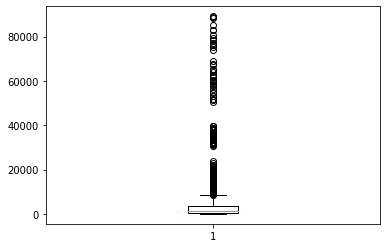

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(F_store_gender['여성_이용횟수'])
plt.figure(figsize = (20, 20))
plt.show()

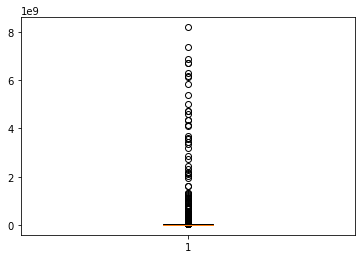

<Figure size 4320x4320 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(F_store_gender['여성_구매금액'])
plt.figure(figsize = (60, 60))
plt.show()

In [ ]:
import numpy as np

# 필요한 데이터만 골라서 합치기
store_gender = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '성별']], on = '고객번호')

# 여성만 골라내기
F_store_gender = store_gender.query("성별 == 'F'")

# 점포별, 분기별 이용횟수 및 구매금액 구하기
F_store_gender = F_store_gender.groupby(['점포코드', '분기'])[['고객번호', '구매금액']].agg({'고객번호' : 'count', '구매금액' : 'sum'}).reset_index()
F_store_gender.columns = ['점포코드', '분기', '여성_이용횟수', '여성_구매금액']

# 없는 분기에는 0으로 값 채우기
for i in F_store_gender['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = F_store_gender.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '여성_이용횟수' : 0, '여성_구매금액' : 0}, index = [0])
      F_store_gender = pd.concat([F_store_gender, add_df])

F_store_gender = F_store_gender.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]

# 이용횟수 등급 구하기(20등급)
F_store_gender['여성이용횟수_등급'] = np.log1p(F_store_gender['여성_이용횟수'])
labels = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(F_store_gender['여성이용횟수_등급'], 20, labels = labels)
F_store_gender['여성이용횟수_등급'] = bins

# 구매금액 등급 구하기(30등급)
F_store_gender['여성구매금액_등급'] = np.log1p(F_store_gender['여성_구매금액'])
labels = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(F_store_gender['여성구매금액_등급'], 30, labels = labels)
F_store_gender['여성구매금액_등급'] = bins
F_store_gender

,점포코드,분기,여성_이용횟수,여성_구매금액,여성이용횟수_등급,여성구매금액_등급
0,A1,1,32554,4329361050,2,1
1,A1,2,38137,4726419530,2,1
2,A1,3,36144,4108896650,2,1
3,A1,4,38814,5388437100,2,1
4,A1,5,34786,4607985400,2,1
...,...,...,...,...,...,...
1299,D8,4,192,1168230,11,12
1300,D8,5,183,1448420,11,12
1301,D8,6,349,2768970,10,11
1302,D8,7,215,2705850,11,11


In [ ]:
F_store_gender[['점포코드', '분기', '여성이용횟수_등급', '여성구매금액_등급']].to_csv('female_count_feature_1.csv')

### 남성의 이용횟수 및 구매금액

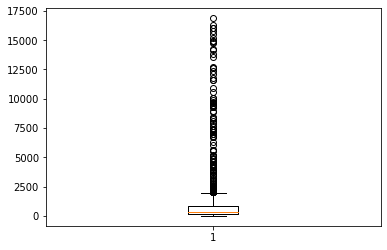

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(M_store_gender['남성_이용횟수'])
plt.figure(figsize = (20, 20))
plt.show()

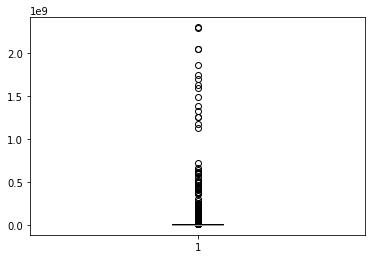

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(M_store_gender['남성_구매금액'])
plt.figure(figsize = (20, 20))
plt.show()

In [ ]:
import numpy as np

# 필요한 데이터만 골라서 합치기
store_gender = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '성별']], on = '고객번호')

# 남성만 골라내기
M_store_gender = store_gender.query("성별 == 'M'")

# 점포별, 분기별 이용횟수 및 구매금액 구하기
M_store_gender = M_store_gender.groupby(['점포코드', '분기'])[['고객번호', '구매금액']].agg({'고객번호' : 'count', '구매금액' : 'sum'}).reset_index()
M_store_gender.columns = ['점포코드', '분기', '남성_이용횟수', '남성_구매금액']

# 없는 분기에는 0으로 값 채우기
for i in M_store_gender['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = M_store_gender.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '남성_이용횟수' : 0, '남성_구매금액' : 0}, index = [0])
      M_store_gender = pd.concat([M_store_gender, add_df])

M_store_gender.reset_index(inplace = True)
M_store_gender = M_store_gender.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]

# # 이용횟수 등급 구하기(20등급)
M_store_gender['남성이용횟수_등급'] = np.log1p(M_store_gender['남성_이용횟수'])
labels = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(M_store_gender['남성이용횟수_등급'], 20, labels = labels)
M_store_gender['남성이용횟수_등급'] = bins


# # 구매금액 등급 구하기(30등급)
M_store_gender['남성구매금액_등급'] = np.log1p(M_store_gender['남성_구매금액'])
labels = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
bins = pd.cut(M_store_gender['남성구매금액_등급'], 30, labels = labels)
M_store_gender['남성구매금액_등급'] = bins
M_store_gender

,index,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급,남성구매금액_등급
0,0,A1,1,6089,1178828260,3,1
1,1,A1,2,7426,1492873860,2,1
2,2,A1,3,6772,1123602350,2,1
3,3,A1,4,7892,2299230340,2,1
4,4,A1,5,7014,1251558270,2,1
...,...,...,...,...,...,...,...
1299,1265,D8,4,110,692910,11,12
1300,1266,D8,5,87,621550,11,12
1301,1267,D8,6,118,1132160,11,11
1302,1268,D8,7,111,598140,11,12


In [ ]:
M_store_gender.groupby('남성구매금액_등급').count()

,index,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급
남성구매금액_등급,,,,,,
"(-0.0216, 0.719]",34,34,34,34,34,34
"(0.719, 1.437]",0,0,0,0,0,0
"(1.437, 2.156]",0,0,0,0,0,0
"(2.156, 2.874]",0,0,0,0,0,0
"(2.874, 3.593]",0,0,0,0,0,0
"(3.593, 4.311]",0,0,0,0,0,0
"(4.311, 5.03]",0,0,0,0,0,0
"(5.03, 5.748]",0,0,0,0,0,0
"(5.748, 6.467]",0,0,0,0,0,0


In [ ]:
# ['C242', 'C343', 'C474', 'C477', 'C522', 'C557']
M_store_gender[M_store_gender['점포코드'] == 'C557']

,점포코드,분기,남성_이용횟수,남성_구매금액
1096,C557,3,31,135730
1097,C557,4,51,220260
1098,C557,5,30,130040
1099,C557,6,5,20750
1100,C557,7,31,181530
1101,C557,8,29,122420
0,C557,1,0,0
0,C557,2,0,0


In [ ]:
M_store_gender = M_store_gender.iloc[:, 1:]
M_store_gender

,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급,남성구매금액_등급
0,A1,1,6089,1178828260,"(8.273, 8.759]",1
1,A1,2,7426,1492873860,"(8.759, 9.246]",1
2,A1,3,6772,1123602350,"(8.759, 9.246]",1
3,A1,4,7892,2299230340,"(8.759, 9.246]",1
4,A1,5,7014,1251558270,"(8.759, 9.246]",1
...,...,...,...,...,...,...
1299,D8,4,110,692910,"(4.38, 4.866]",12
1300,D8,5,87,621550,"(4.38, 4.866]",12
1301,D8,6,118,1132160,"(4.38, 4.866]",11
1302,D8,7,111,598140,"(4.38, 4.866]",12


In [ ]:
M_store_gender[['점포코드', '분기', '남성이용횟수_등급', '남성구매금액_등급']].to_csv('male_store_feature_1.csv')

In [ ]:
M_store_gender.to_csv('male_store_feature_1.csv')

## 구개고객 연령대

### 각 연령대 비율

In [ ]:
# 필요한 칼럼만 추려내서 테이블 합치기
age_store = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '연령대']], on = '고객번호')

# groupby해서 묶기
age_gen_store = age_store.groupby(['점포코드', '분기', '연령대'])[['고객번호']].count().reset_index()

# 위 테이블로 피벗 만들고 테이블로 만들기
age_store_pivot = pd.pivot_table(age_gen_store, index = ['점포코드', '분기'], columns = '연령대', values = '고객번호').reset_index()

# NaN값 0으로 바꾸기
age_store_pivot = age_store_pivot.fillna(0)

# 각 연령대 등급화하기
for i in range(2, 12):
  labels = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
  bins = pd.cut(age_store_pivot.iloc[:, i], 10, labels = labels)
  age_store_pivot.iloc[:, i] = bins

# 칼럼명 바꾸기
age_store_pivot.columns = ['점포코드', '분기', '19세이하_등급', '20세~24세_등급', '25세~29세_등급', '30세~34세_등급', '35세~39세_등급',
                        '40세~44세_등급', '45세~49세_등급', '50세~54세_등급', '55세~59세_등급', '60세이상_등급']
age_store_pivot

In [ ]:
age_store_pivot

,점포코드,분기,19세이하_등급,20세~24세_등급,25세~29세_등급,30세~34세_등급,35세~39세_등급,40세~44세_등급,45세~49세_등급,50세~54세_등급,55세~59세_등급,60세이상_등급
0,A1,1st,10,7,5,4,7,6,7,7,8,8
1,A1,2nd,10,6,4,3,6,6,7,7,7,7
2,A1,3rd,10,6,3,3,7,6,7,7,7,7
3,A1,4th,10,5,2,2,6,6,7,7,7,7
4,A1,5th,10,5,1,3,7,6,7,7,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4th,10,10,10,10,10,10,10,10,10,10
1300,D8,5th,10,10,10,10,10,10,10,10,10,10
1301,D8,6th,10,9,9,10,10,10,10,10,10,10
1302,D8,7th,10,9,10,10,10,10,10,10,10,10


In [ ]:
age_store_pivot.to_csv('age_gen_feature_2.csv')

In [ ]:
# 필요한 칼럼만 추려내서 테이블 합치기
age_store = pd.merge(df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']], df_custdemo[['고객번호', '연령대']], on = '고객번호')

# groupby해서 묶기
age_gen_store = age_store.groupby(['점포코드', '분기', '연령대'])[['고객번호']].count().reset_index()
age_gen_store.columns = ['점포코드', '분기', '연령대', '연령별_count']

# 각 점포별 연령 비율 알기 위해 각 점포 전체 고객수 count해서 합치기
total_count = age_store.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
age_gen_store = pd.merge(age_gen_store, total_count, on = ['점포코드', '분기'])
age_gen_store['연령별비율'] = age_gen_store['연령별_count']/age_gen_store['고객번호']

# 테이블 정리하기
age_gen_store = age_gen_store[['점포코드', '분기', '연령대', '연령별비율']]

# 위 테이블로 피벗 만들고 테이블로 만들기
age_store_pivot = pd.pivot_table(age_gen_store, index = ['점포코드', '분기'], columns = '연령대', values = '연령별비율').reset_index()

# NaN값 0으로 바꾸기
age_store_pivot = age_store_pivot.fillna(0)
age_store_pivot

연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
0,A1,1,0.000000,0.009808,0.037678,0.120488,0.105996,0.168077,0.167948,0.146728,0.112310,0.130968
1,A1,2,0.000000,0.011479,0.040208,0.114654,0.105875,0.157211,0.165244,0.156465,0.118342,0.130523
2,A1,3,0.000047,0.011371,0.044972,0.120468,0.105672,0.146379,0.162247,0.152577,0.118091,0.138177
3,A1,4,0.000021,0.013596,0.049523,0.126515,0.102150,0.161821,0.165461,0.150859,0.099816,0.130240
4,A1,5,0.000000,0.016483,0.056579,0.124139,0.099665,0.167967,0.160287,0.145550,0.102440,0.126890
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,0.215232,0.559603,0.026490,0.188742,0.003311,0.000000,0.006623,0.000000,0.000000
1300,D8,5,0.000000,0.244444,0.525926,0.025926,0.192593,0.000000,0.003704,0.007407,0.000000,0.000000
1301,D8,6,0.000000,0.269807,0.569593,0.004283,0.130621,0.008565,0.010707,0.006424,0.000000,0.000000
1302,D8,7,0.000000,0.392638,0.420245,0.015337,0.138037,0.000000,0.015337,0.018405,0.000000,0.000000


In [ ]:
age_store_pivot['19세이하'] = age_store_pivot['19세이하']*19
age_store_pivot['20세~24세'] = age_store_pivot['20세~24세']*24
age_store_pivot['25세~29세'] = age_store_pivot['25세~29세']*29
age_store_pivot['30세~34세'] = age_store_pivot['30세~34세']*34
age_store_pivot['35세~39세'] = age_store_pivot['35세~39세']*39
age_store_pivot['40세~44세'] = age_store_pivot['40세~44세']*44
age_store_pivot['45세~49세'] = age_store_pivot['45세~49세']*49
age_store_pivot['50세~54세'] = age_store_pivot['50세~54세']*54
age_store_pivot['55세~59세'] = age_store_pivot['55세~59세']*59
age_store_pivot['60세이상'] = age_store_pivot['60세이상']*60
age_store_pivot

연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상
0,A1,1,0.000000,0.235385,1.092669,4.096576,4.133841,7.395389,8.229434,7.923298,6.626297,7.858086
1,A1,2,0.000000,0.275487,1.166034,3.898251,4.129140,6.917279,8.096943,8.449092,6.982157,7.831354
2,A1,3,0.000885,0.272905,1.304176,4.095908,4.121190,6.440675,7.950112,8.239165,6.967378,8.290614
3,A1,4,0.000407,0.326296,1.436154,4.301503,3.983835,7.120113,8.107566,8.146362,5.889136,7.814414
4,A1,5,0.000000,0.395598,1.640789,4.220718,3.886938,7.390526,7.854067,7.859713,6.043971,7.613397
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,5.165563,16.228477,0.900662,7.360927,0.145695,0.000000,0.357616,0.000000,0.000000
1300,D8,5,0.000000,5.866667,15.251852,0.881481,7.511111,0.000000,0.181481,0.400000,0.000000,0.000000
1301,D8,6,0.000000,6.475375,16.518201,0.145610,5.094218,0.376874,0.524625,0.346895,0.000000,0.000000
1302,D8,7,0.000000,9.423313,12.187117,0.521472,5.383436,0.000000,0.751534,0.993865,0.000000,0.000000


In [ ]:
age_store_pivot['연령대가중치합'] = age_store_pivot.sum(axis = 1)
age_store_pivot

<ipython-input-220-b02ee6dd41d3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  age_store_pivot['연령대가중치합'] = age_store_pivot.sum(axis = 1)


연령대,점포코드,분기,19세이하,20세~24세,25세~29세,30세~34세,35세~39세,40세~44세,45세~49세,50세~54세,55세~59세,60세이상,연령대가중치합
0,A1,1,0.000000,0.235385,1.092669,4.096576,4.133841,7.395389,8.229434,7.923298,6.626297,7.858086,48.590974
1,A1,2,0.000000,0.275487,1.166034,3.898251,4.129140,6.917279,8.096943,8.449092,6.982157,7.831354,49.745737
2,A1,3,0.000885,0.272905,1.304176,4.095908,4.121190,6.440675,7.950112,8.239165,6.967378,8.290614,50.683009
3,A1,4,0.000407,0.326296,1.436154,4.301503,3.983835,7.120113,8.107566,8.146362,5.889136,7.814414,51.125787
4,A1,5,0.000000,0.395598,1.640789,4.220718,3.886938,7.390526,7.854067,7.859713,6.043971,7.613397,51.905718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,D8,4,0.000000,5.165563,16.228477,0.900662,7.360927,0.145695,0.000000,0.357616,0.000000,0.000000,34.158940
1300,D8,5,0.000000,5.866667,15.251852,0.881481,7.511111,0.000000,0.181481,0.400000,0.000000,0.000000,35.092593
1301,D8,6,0.000000,6.475375,16.518201,0.145610,5.094218,0.376874,0.524625,0.346895,0.000000,0.000000,35.481799
1302,D8,7,0.000000,9.423313,12.187117,0.521472,5.383436,0.000000,0.751534,0.993865,0.000000,0.000000,36.260736


In [ ]:
age_store_pivot[['점포코드', '분기', '연령대가중치합']].to_csv('age_store_feature_2.csv')

## 평균방문점포수


In [ ]:
# 필요한 내용만 추출하기
store_count = df_purprodtr[['고객번호', '점포코드', '구매금액', '분기']]

# 필요한 컬럼 추가하기
store_count['방문점포'] = store_count['점포코드'].copy()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년도,월,분기
0,B,6519000,79,7903,B790310,2716,B7,20141216,21,14400,2014,12,4th
1,B,6518999,43,4310,B431001,9017,B7,20141216,21,4880,2014,12,4th
2,B,6518999,52,5205,B520503,9017,B7,20141216,21,7900,2014,12,4th
3,B,6518999,52,5209,B520903,9017,B7,20141216,21,4500,2014,12,4th
4,B,6518999,55,5501,B550112,9017,B7,20141216,21,10000,2014,12,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8336524,B,6970670,12,1209,B120901,766,B12,20150802,12,9100,2015,08,7th
8336525,B,6970670,38,3803,B380303,766,B12,20150802,12,1000,2015,08,7th
8336526,B,6970670,72,7201,B720102,766,B12,20150802,12,6800,2015,08,7th
8336527,B,6970670,72,7201,B720104,766,B12,20150802,12,8500,2015,08,7th


In [ ]:
store_count.query("고객번호 == 2716")['분기'].unique()

array(['4th', '3rd', '2nd', '1st', '5th', '7th', '6th', '8th'],
      dtype=object)

In [ ]:
# 1분기
store_count_1st = store_count.query("분기 == '1st'")
quarter_1_dict = {}

for i in store_count_1st['점포코드'].unique():
  cust_list = [x for x in store_count_1st.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_1st.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_1_dict[f'{i}'] = average
quarter_1_dict

{'B8': 3.292507204610951,
 'C306': 2.823529411764706,
 'A12': 3.1584269662921347,
 'A20': 3.1757618710134654,
 'A1': 3.0239710538218,
 'A2': 3.2572488199595413,
 'A9': 2.671826625386997,
 'D3': 4.64367816091954,
 'D4': 4.12,
 'D1': 3.6341463414634148,
 'D12': 4.487804878048781,
 'A26': 3.736517719568567,
 'A24': 3.622429906542056,
 'C325': 3.125,
 'A3': 3.574144486692015,
 'C15': 3.25,
 'A39': 3.0866336633663365,
 'C312': 3.4649122807017543,
 'C310': 2.3043478260869565,
 'C236': 3.4363636363636365,
 'C318': 3.7661290322580645,
 'B13': 3.2036363636363636,
 'B14': 2.621495327102804,
 'B9': 3.0730088495575223,
 'B7': 3.5995397008055234,
 'C319': 2.1363636363636362,
 'A5': 2.909547738693467,
 'D11': 3.888888888888889,
 'B6': 3.415525114155251,
 'D2': 3.85,
 'D10': 4.035714285714286,
 'D6': 4.054054054054054,
 'D7': 3.9402985074626864,
 'B4': 3.557446808510638,
 'C331': 3.78,
 'C434': 1.0,
 'D5': 4.5,
 'C342': 3.7547169811320753,
 'C571': 3.6,
 'D8': 4.090909090909091,
 'C573': 3.125,
 'B11

In [ ]:
# 2분기
store_count_2nd = store_count.query("분기 == '2nd'")
quarter_2_dict = {}

for i in store_count_2nd['점포코드'].unique():
  cust_list = [x for x in store_count_2nd.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_2nd.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_2_dict[f'{i}'] = average
quarter_2_dict

{'C306': 2.0,
 'A1': 3.05504984828782,
 'D3': 5.06140350877193,
 'A2': 3.344504021447721,
 'A24': 3.679035250463822,
 'A26': 3.9228611500701263,
 'D12': 4.462686567164179,
 'A20': 3.195361911454673,
 'C356': 1.6875,
 'B41': 2.3354632587859423,
 'B11': 3.849906191369606,
 'B7': 3.8035502958579883,
 'B9': 3.2672413793103448,
 'A12': 3.2668957617411225,
 'D6': 4.578947368421052,
 'A5': 2.79295154185022,
 'B14': 2.841860465116279,
 'C312': 3.392857142857143,
 'C236': 3.9642857142857144,
 'B13': 3.2504504504504506,
 'C571': 3.6923076923076925,
 'A9': 2.606811145510836,
 'D2': 4.195652173913044,
 'A3': 3.5272727272727273,
 'C318': 3.6083916083916083,
 'C310': 2.892857142857143,
 'D7': 3.7567567567567566,
 'D11': 5.35,
 'D4': 4.388888888888889,
 'A39': 3.1095571095571097,
 'C325': 2.9310344827586206,
 'B6': 3.5096618357487923,
 'C331': 3.6607142857142856,
 'B4': 3.581818181818182,
 'D1': 4.0,
 'C330': 2.6666666666666665,
 'C15': 3.3548387096774195,
 'B8': 3.2386706948640485,
 'C434': 1.0,
 'D

In [ ]:
# 3분기
store_count_3rd = store_count.query("분기 == '3rd'")
quarter_3_dict = {}

for i in store_count_3rd['점포코드'].unique():
  cust_list = [x for x in store_count_3rd.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_3rd.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_3_dict[f'{i}'] = average
quarter_3_dict

{'B7': 3.7969107551487413,
 'B12': 3.4661654135338344,
 'C434': 1.0,
 'C306': 2.1875,
 'C318': 4.0,
 'C325': 2.3793103448275863,
 'A5': 3.0535714285714284,
 'B6': 3.5558194774346794,
 'B8': 3.350983358547655,
 'A20': 3.259831460674157,
 'A1': 3.079916317991632,
 'D12': 4.741935483870968,
 'A12': 3.212486308871851,
 'A2': 3.363546146212372,
 'C331': 3.74,
 'D3': 4.6722689075630255,
 'B9': 3.168627450980392,
 'D5': 3.3548387096774195,
 'D7': 3.342857142857143,
 'A3': 3.5850178359096314,
 'A26': 3.8658854166666665,
 'B13': 3.219600725952813,
 'D2': 3.5675675675675675,
 'D1': 3.3454545454545452,
 'B11': 3.7353951890034365,
 'B3': 3.1083333333333334,
 'B14': 2.7442922374429224,
 'A9': 2.7405731523378583,
 'A24': 3.774757281553398,
 'D10': 4.087719298245614,
 'C312': 3.4745762711864407,
 'B41': 2.517906336088154,
 'D11': 4.388888888888889,
 'D6': 3.918918918918919,
 'C330': 2.130434782608696,
 'C319': 2.5652173913043477,
 'C356': 1.875,
 'D4': 4.32258064516129,
 'A39': 3.0776699029126213,
 '

In [ ]:
# 4분기
store_count_4th = store_count.query("분기 == '4th'")
quarter_4_dict = {}

for i in store_count_4th['점포코드'].unique():
  cust_list = [x for x in store_count_4th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_4th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_4_dict[f'{i}'] = average
quarter_4_dict

{'B7': 3.7525342874180083,
 'C434': 1.0,
 'A26': 3.7791164658634537,
 'D10': 3.953846153846154,
 'B13': 3.280357142857143,
 'C306': 2.0588235294117645,
 'D12': 4.448275862068965,
 'D11': 4.052631578947368,
 'D7': 3.514018691588785,
 'A1': 3.03800170794193,
 'A12': 3.310308182784272,
 'C331': 3.6862745098039214,
 'C312': 3.543103448275862,
 'C330': 3.526315789473684,
 'B9': 3.214141414141414,
 'D5': 2.9565217391304346,
 'C325': 2.4482758620689653,
 'D2': 3.6296296296296298,
 'D3': 4.541666666666667,
 'D1': 3.625,
 'A2': 3.313015873015873,
 'C310': 2.32,
 'A9': 2.6302158273381293,
 'A20': 3.1769662921348316,
 'A24': 3.7314285714285713,
 'C318': 3.8435374149659864,
 'C535': 3.0416666666666665,
 'C573': 2.888888888888889,
 'B12': 3.573529411764706,
 'B6': 3.464720194647202,
 'A39': 3.008968609865471,
 'B41': 2.5558912386706947,
 'A3': 3.4787472035794185,
 'A5': 2.8820960698689957,
 'D6': 3.59375,
 'D4': 4.25,
 'B14': 2.9907834101382487,
 'C294': 1.0,
 'C319': 2.4,
 'C571': 3.5,
 'C356': 2.

In [ ]:
# 5분기
store_count_5th = store_count.query("분기 == '5th'")
quarter_5_dict = {}

for i in store_count_5th['점포코드'].unique():
  cust_list = [x for x in store_count_5th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_5th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_5_dict[f'{i}'] = average
quarter_5_dict

{'B13': 3.2646536412078153,
 'B7': 3.6943231441048034,
 'B11': 3.702749140893471,
 'D3': 4.475,
 'C330': 3.0526315789473686,
 'D1': 3.3380281690140845,
 'C306': 2.1714285714285713,
 'C331': 3.6296296296296298,
 'C312': 3.40625,
 'C310': 1.8181818181818181,
 'B9': 3.0833333333333335,
 'C319': 2.727272727272727,
 'B8': 3.2152466367713006,
 'B12': 3.316666666666667,
 'C318': 3.7941176470588234,
 'D2': 3.5098039215686274,
 'A2': 3.269883527454243,
 'B6': 3.232843137254902,
 'A3': 3.452694610778443,
 'D5': 3.25,
 'C535': 3.076923076923077,
 'A12': 3.1989473684210528,
 'A9': 2.620740740740741,
 'D4': 4.314285714285714,
 'C1': 3.6564885496183206,
 'D7': 3.9243697478991595,
 'D12': 4.45,
 'A1': 3.011826544021025,
 'C325': 2.793103448275862,
 'C573': 2.888888888888889,
 'B14': 2.892523364485981,
 'A20': 3.1632216678545975,
 'A24': 3.6557377049180326,
 'D10': 4.323529411764706,
 'A26': 3.817415730337079,
 'D11': 3.838709677419355,
 'B41': 2.4986149584487536,
 'A5': 2.9205607476635516,
 'D6': 3.9

In [ ]:
# 6분기
store_count_6th = store_count.query("분기 == '6th'")
quarter_6_dict = {}

for i in store_count_6th['점포코드'].unique():
  cust_list = [x for x in store_count_6th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_6th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_6_dict[f'{i}'] = average
quarter_6_dict

{'B13': 3.1785063752276868,
 'B9': 3.134020618556701,
 'B7': 3.6873449131513647,
 'A1': 2.9837147887323945,
 'D3': 4.689922480620155,
 'D8': 2.8181818181818183,
 'B14': 2.683720930232558,
 'B12': 3.3046875,
 'D12': 4.294117647058823,
 'A20': 3.1245474293989863,
 'C310': 2.2916666666666665,
 'C312': 3.656716417910448,
 'B41': 2.490740740740741,
 'C330': 2.1052631578947367,
 'C246': 2.6875,
 'C319': 2.7083333333333335,
 'C318': 3.801470588235294,
 'A12': 3.1847206385404787,
 'B11': 3.713163064833006,
 'D4': 4.05,
 'A2': 3.243478260869565,
 'A9': 2.607717041800643,
 'C331': 3.6785714285714284,
 'B6': 3.325814536340852,
 'D1': 3.621212121212121,
 'C306': 2.8333333333333335,
 'C325': 2.4193548387096775,
 'D2': 4.125,
 'D5': 3.967741935483871,
 'D10': 4.132075471698113,
 'D6': 3.8780487804878048,
 'D7': 3.774193548387097,
 'A26': 3.742128935532234,
 'A24': 3.6405353728489485,
 'D11': 4.305555555555555,
 'B8': 3.2296875,
 'C434': 1.0,
 'A5': 2.9033816425120773,
 'C571': 3.2,
 'C573': 3.666666

In [ ]:
# 7분기
store_count_7th = store_count.query("분기 == '7th'")
quarter_7_dict = {}

for i in store_count_7th['점포코드'].unique():
  cust_list = [x for x in store_count_7th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_7th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_7_dict[f'{i}'] = average
quarter_7_dict

{'B11': 3.691743119266055,
 'B7': 3.7141990291262137,
 'C310': 2.48,
 'D10': 3.9782608695652173,
 'D3': 4.291666666666667,
 'D1': 3.462686567164179,
 'D11': 4.4,
 'B10': 2.787878787878788,
 'B8': 3.1533742331288344,
 'B9': 3.0892857142857144,
 'D4': 4.083333333333333,
 'D5': 3.433333333333333,
 'B14': 2.8794642857142856,
 'C331': 3.8,
 'C246': 3.1176470588235294,
 'B13': 3.165745856353591,
 'B12': 3.159090909090909,
 'C318': 3.7555555555555555,
 'C1': 3.5655737704918034,
 'C325': 2.28125,
 'C312': 3.472972972972973,
 'B3': 3.234234234234234,
 'D8': 3.5,
 'D12': 4.728571428571429,
 'C317': 2.9,
 'C14': 3.0,
 'B41': 2.5680473372781063,
 'D6': 3.85,
 'C319': 2.3636363636363638,
 'D2': 3.775,
 'A5': 3.0216450216450217,
 'C434': 1.0,
 'C571': 3.142857142857143,
 'C573': 3.4285714285714284,
 'D7': 3.8020833333333335,
 'C356': 1.9230769230769231,
 'A20': 3.179224579370885,
 'A2': 3.2823800131492438,
 'A3': 3.550943396226415,
 'A1': 3.011240812797233,
 'A24': 3.757201646090535,
 'A12': 3.14705

In [ ]:
# 8분기
store_count_8th = store_count.query("분기 == '8th'")
quarter_8_dict = {}

for i in store_count_8th['점포코드'].unique():
  cust_list = [x for x in store_count_8th.query(f"점포코드 == '{i}'")['고객번호'].unique()]
  cust_store_num = 0
  for j in cust_list:
    num = len(store_count_8th.query(f"고객번호 == {int(j)}")['점포코드'].unique())
    cust_store_num += num
  average = cust_store_num / len(cust_list)
  quarter_8_dict[f'{i}'] = average
quarter_8_dict

{'B7': 3.7347580138277814,
 'C308': 3.611111111111111,
 'C141': 3.1875,
 'D10': 4.3,
 'D8': 3.8,
 'D7': 3.9444444444444446,
 'A2': 3.228473733291887,
 'D11': 4.15625,
 'C331': 3.9642857142857144,
 'C139': 3.564766839378238,
 'B14': 2.811926605504587,
 'B8': 3.208469055374593,
 'B9': 3.147286821705426,
 'C22': 4.4,
 'D12': 4.318181818181818,
 'B41': 2.6253602305475505,
 'A26': 3.8559670781893005,
 'C99': 3.5,
 'C97': 3.5,
 'C20': 3.7674418604651163,
 'C14': 3.0,
 'D5': 3.6923076923076925,
 'C142': 2.8,
 'B13': 3.141472868217054,
 'C191': 4.051282051282051,
 'C19': 3.864406779661017,
 'D3': 4.306666666666667,
 'A20': 3.180293501048218,
 'A12': 3.235613463626493,
 'C318': 3.671232876712329,
 'C143': 3.260869565217391,
 'A9': 2.6897590361445785,
 'D6': 3.8684210526315788,
 'C310': 2.5652173913043477,
 'C319': 2.9583333333333335,
 'D1': 3.0919540229885056,
 'C300': 3.92,
 'C325': 3.1,
 'C317': 3.5517241379310347,
 'B6': 3.443589743589744,
 'D2': 3.4468085106382977,
 'A24': 3.652255639097744

In [ ]:
import pandas as pd
q1 = pd.DataFrame(quarter_1_dict.values(), index = quarter_1_dict.keys())
q2 = pd.DataFrame(quarter_2_dict.values(), index = quarter_2_dict.keys())
q3 = pd.DataFrame(quarter_3_dict.values(), index = quarter_3_dict.keys())
q4 = pd.DataFrame(quarter_4_dict.values(), index = quarter_4_dict.keys())
q5 = pd.DataFrame(quarter_5_dict.values(), index = quarter_5_dict.keys())
q6 = pd.DataFrame(quarter_6_dict.values(), index = quarter_6_dict.keys())
q7 = pd.DataFrame(quarter_7_dict.values(), index = quarter_7_dict.keys())
q8 = pd.DataFrame(quarter_8_dict.values(), index = quarter_8_dict.keys())

In [ ]:
q1['분기'] = '1st'
q2['분기'] = '2nd'
q3['분기'] = '3rd'
q4['분기'] = '4th'
q5['분기'] = '5th'
q6['분기'] = '6th'
q7['분기'] = '7th'
q8['분기'] = '8th'

In [ ]:
q1 = q1.reset_index()
q1.columns = ['점포코드', '이용점포평균', '분기']

q2 = q2.reset_index()
q2.columns = ['점포코드', '이용점포평균', '분기']

q3 = q3.reset_index()
q3.columns = ['점포코드', '이용점포평균', '분기']

q4 = q4.reset_index()
q4.columns = ['점포코드', '이용점포평균', '분기']

q5 = q5.reset_index()
q5.columns = ['점포코드', '이용점포평균', '분기']

q6 = q6.reset_index()
q6.columns = ['점포코드', '이용점포평균', '분기']

q7 = q7.reset_index()
q7.columns = ['점포코드', '이용점포평균', '분기']

q8 = q8.reset_index()
q8.columns = ['점포코드', '이용점포평균', '분기']

In [ ]:
store_count_df = pd.concat([q1, q2, q3, q4, q5, q6, q7, q8], axis = 0)
store_count_df

,점포코드,이용점포평균,분기
0,B8,3.292507,1st
1,C306,2.823529,1st
2,A12,3.158427,1st
3,A20,3.175762,1st
4,A1,3.023971,1st
...,...,...,...
158,C113,4.000000,8th
159,C242,3.000000,8th
160,B15,4.221519,8th
161,C412,2.500000,8th


In [ ]:
store_count = store_count_df.sort_values(['점포코드', '분기'])
store_count

,점포코드,이용점포평균,분기
4,A1,3.023971,1st
1,A1,3.055050,2nd
10,A1,3.079916,3rd
9,A1,3.038002,4th
27,A1,3.011827,5th
...,...,...,...
41,D8,3.937500,4th
40,D8,3.571429,5th
5,D8,2.818182,6th
22,D8,3.500000,7th


In [ ]:
store_count['점포이용평균'] = store_count['이용점포평균'].copy()
store_count

,점포코드,이용점포평균,분기,점포이용평균
4,A1,3.023971,1st,3.023971
1,A1,3.055050,2nd,3.055050
10,A1,3.079916,3rd,3.079916
9,A1,3.038002,4th,3.038002
27,A1,3.011827,5th,3.011827
...,...,...,...,...
41,D8,3.937500,4th,3.937500
40,D8,3.571429,5th,3.571429
5,D8,2.818182,6th,2.818182
22,D8,3.500000,7th,3.500000


In [ ]:
store_count = store_count[['점포코드', '분기', '점포이용평균']].reset_index().iloc[:, 1:]
store_count

,점포코드,분기,점포이용평균
0,A1,1st,3.023971
1,A1,2nd,3.055050
2,A1,3rd,3.079916
3,A1,4th,3.038002
4,A1,5th,3.011827
...,...,...,...
1299,D8,4th,3.937500
1300,D8,5th,3.571429
1301,D8,6th,2.818182
1302,D8,7th,3.500000


In [ ]:
store_count.to_csv('store_count_feature_3.csv')

## VIP 타점포 방문횟수

In [ ]:
# 필요한 칼럼만 추출하기
df_purprodtr = df_purprodtr[['고객번호', '점포코드', '분기', '구매금액']]

# 점포별 고객 수의 10% 구하기
cust_count = df_purprodtr.drop_duplicates(['고객번호', '점포코드', '분기'])
cust_count = cust_count.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
cust_count['고객번호'] = [int(x * 0.1) for x in cust_count['고객번호']]

# 각 점포의 분기, 고객번호 별 구매금액 구하기
top_cust = df_purprodtr.groupby(['점포코드', '분기', '고객번호'])[['구매금액']].sum().reset_index()
top_cust = top_cust.sort_values('구매금액', ascending = False)
top_cust = top_cust.sort_values(['점포코드', '분기'])
top_cust = top_cust.reset_index().iloc[:, 1:]

# 두 테이블 합치기
merge_to_count = pd.merge(cust_count, top_cust, on = ['점포코드', '분기'])
merge_to_count.columns = ['점포코드', '분기', '상위고객수', '고객번호', '구매금액']

# 상위고객만 뽑아서 테이블 만듦
target_df = pd.DataFrame()

for i in merge_to_count['점포코드'].unique():
  for j in merge_to_count['분기'].unique():
    df = merge_to_count.query(f"점포코드 == '{i}' & 분기 == {j}")
    num = int(df['상위고객수'].unique())
    df_toadd = df.iloc[:num+1, :]
    target_df = pd.concat([target_df, df_toadd])

target_df = target_df.reset_index().iloc[:, 1:]
target_df
# 각 점포마다 분기별 상위고객들의 평균이용 점포수를 구하기 위한 for문
import pandas as pd

vip_count_df = pd.DataFrame({'점포코드' : [], '분기' : [], '상위고객평균점포수' : []})

for i in df_purprodtr['점포코드'].unique():
  for j in df_purprodtr['분기'].unique():
    cust_list = [x for x in target_df.query(f"점포코드 == '{i}' & 분기 == {j}")['고객번호'].unique()]
    cust_store_count = 0
    for cust in cust_list:
      num = len(df_purprodtr.query(f"고객번호 == {int(cust)}")['점포코드'].unique())
      cust_store_count += num
    average = cust_store_count / len(cust_list)
    vip_count_df = vip_count_df.append({'점포코드' : f'{i}', '분기' : f'{j}', '상위고객평균점포수' : average}, ignore_index = True)

vip_count_df

,점포코드,분기,상위고객수,고객번호,구매금액
0,A1,1,221,39,70381190
1,A1,1,221,562,59336440
2,A1,1,221,1355,55857680
3,A1,1,221,6867,53999270
4,A1,1,221,6355,50896430
...,...,...,...,...,...
18419,D8,7,2,16424,588240
18420,D8,7,2,2430,310800
18421,D8,8,2,16127,501350
18422,D8,8,2,8915,284970


In [ ]:
vip_count_df = vip_count_df.sort_values(['점포코드', '분기'])
vip_count_df

,점포코드,분기,상위고객평균점포수
58,A1,1,5.328829
59,A1,2,5.580087
57,A1,3,5.491667
56,A1,4,5.761702
62,A1,5,5.414847
...,...,...,...
384,D8,4,6.000000
390,D8,5,5.000000
391,D8,6,6.000000
388,D8,7,8.000000


In [ ]:
vip_count_df.to_csv('vip_store_count_Feature_4.csv')

## 소액/고액 매출기여도

In [ ]:
# 필요한 피처만 추출
df_purprodtr = df_purprodtr[['점포코드', '분기', '고객번호', '구매금액']]

# 전체 구매금액
entire_purchase = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
entire_purchase.columns = ['점포코드', '분기', '총구매금액']

# 소액고객 비율 보기(기준 10만원)
small_purchase = price_df.query("구매금액 < 100000").groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
small_purchase.columns = ['점포코드', '분기', '소액구매금액']

small_purchase = pd.merge(small_purchase, entire_purchase, on = ['점포코드', '분기'])

small_purchase['소액금액비율'] = small_purchase['소액구매금액'] / small_purchase['총구매금액']

small_purch = small_purchase[['점포코드', '분기', '소액금액비율']]

small_purch
# 고액은 점포별로 기준 정하기
high_stand = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].max().reset_index()
high_stand['상위기준'] = [round(x*0.7) for x in high_stand['구매금액']]

# 전체 데이터랑 상위기준 합치기
large_purchase = pd.merge(df_purprodtr, high_stand[['점포코드', '분기', '상위기준']], on = ['점포코드', '분기'])
large_purchase

# 고액구매금액
large_purchase = large_purchase.query("구매금액 > 상위기준").groupby(['점포코드', '분기'])[['구매금액']].sum().reset_index()
large_purchase.columns = ['점포코드', '분기', '고액구매금액']

# 전체랑 합치기
large_purchase = pd.merge(large_purchase, entire_purchase, on = ['점포코드', '분기'])

# large_purchase
large_purchase['고액구매비율'] = large_purchase['고액구매금액'] / large_purchase['총구매금액']
large_purchase = large_purchase[['점포코드', '분기', '고액구매비율']]
large_purchase

,점포코드,분기,고객번호,구매금액
0,B7,4,2716,14400
1,B7,4,9017,4880
2,B7,4,9017,7900
3,B7,4,9017,4500
4,B7,4,9017,10000
...,...,...,...,...
8336524,B12,7,766,9100
8336525,B12,7,766,1000
8336526,B12,7,766,6800
8336527,B12,7,766,8500


In [ ]:
small_purch

,점포코드,분기,소액금액비율
0,A1,1,0.115458
1,A1,2,0.125628
2,A1,3,0.140259
3,A1,4,0.104061
4,A1,5,0.117692
...,...,...,...
1299,D8,4,1.000000
1300,D8,5,1.000000
1301,D8,6,0.961627
1302,D8,7,0.893523


In [ ]:
large_purchase

,점포코드,분기,고액구매비율
0,A1,1,0.008624
1,A1,2,0.013313
2,A1,3,0.036111
3,A1,4,0.018128
4,A1,5,0.025754
...,...,...,...
1299,D8,4,0.045134
1300,D8,5,0.041450
1301,D8,6,0.038373
1302,D8,7,0.045097


In [ ]:
pd.merge(small_purch, large_purchase, on = ['점포코드', '분기']).to_csv('small_large_feature_5.csv')

## 소액/고액 구매고객들의 구매비율

In [ ]:
# 필요한 피처만 추출
df_purprodtr = df_purprodtr[['점포코드', '분기', '고객번호', '구매금액']]

# 전체 구매금액
entire_purchase = df_purprodtr.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
entire_purchase.columns = ['점포코드', '분기', '총고객수']
entire_purchase

# 소액고객 비율 보기(기준 10만원)
small_cust = price_df.query("구매금액 < 100000").groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
small_cust.columns = ['점포코드', '분기', '소액고객수']
small_cust = pd.merge(small_cust, entire_purchase, on = ['점포코드', '분기'])
small_cust['소액고객비율'] = small_cust['소액고객수'] / small_cust['총고객수']
small_cust = small_cust[['점포코드', '분기', '소액고객비율']]
small_cust

,점포코드,분기,소액고객비율
0,A1,1,0.798773
1,A1,2,0.808858
2,A1,3,0.829131
3,A1,4,0.803002
4,A1,5,0.816077
...,...,...,...
1299,D8,4,1.000000
1300,D8,5,1.000000
1301,D8,6,0.997859
1302,D8,7,0.990798


In [ ]:
# 고액은 점포별로 기준 정하기
high_stand = df_purprodtr.groupby(['점포코드', '분기'])[['구매금액']].max().reset_index()
high_stand['상위기준'] = [round(x*0.7) for x in high_stand['구매금액']]

# 전체 데이터랑 상위기준 합치기
large_purchase = pd.merge(df_purprodtr, high_stand[['점포코드', '분기', '상위기준']], on = ['점포코드', '분기'])
large_purchase

# 고액구매금액
large_purchase = large_purchase.query("구매금액 > 상위기준").groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
large_purchase.columns = ['점포코드', '분기', '고액고객수']
large_purchase

,점포코드,분기,고액고객수
0,A1,1,1
1,A1,2,1
2,A1,3,3
3,A1,4,4
4,A1,5,3
...,...,...,...
1299,D8,4,1
1300,D8,5,1
1301,D8,6,1
1302,D8,7,1


In [ ]:
# large_purchase= pd.merge(large_purchase, entire_purchase, on = ['점포코드', '분기'])
large_purchase['고액고객비율'] = large_purchase['고액고객수'] / large_purchase['총고객수']
large_purchase

,점포코드,분기,고액고객수,총고객수,고액고객비율
0,A1,1,1,38643,0.000026
1,A1,2,1,45563,0.000022
2,A1,3,3,42916,0.000070
3,A1,4,4,46706,0.000086
4,A1,5,3,41800,0.000072
...,...,...,...,...,...
1299,D8,4,1,302,0.003311
1300,D8,5,1,270,0.003704
1301,D8,6,1,467,0.002141
1302,D8,7,1,326,0.003067


In [ ]:
large_count = large_purchase[['점포코드', '분기', '고액고객비율']]
large_count

,점포코드,분기,고액고객비율
0,A1,1,0.000026
1,A1,2,0.000022
2,A1,3,0.000070
3,A1,4,0.000086
4,A1,5,0.000072
...,...,...,...
1299,D8,4,0.003311
1300,D8,5,0.003704
1301,D8,6,0.002141
1302,D8,7,0.003067


In [ ]:
pd.merge(small_cust, large_count, on = ['점포코드', '분기']).to_csv('cust_port_Feature_6.csv')

## 재방문율

In [ ]:
# 필요한 칼럼만 추출
visit_df = df_purprodtr[['점포코드', '분기', '구매일자', '고객번호']]
visit_df

temp = visit_df.groupby(['점포코드', '분기', '고객번호'])[['구매일자']].count().reset_index()
temp.columns = ['점포코드', '분기', '고객번호', '재방문수']

In [ ]:
df = visit_df.groupby(['점포코드','분기','고객번호','구매일자']).count().reset_index().groupby(['점포코드','분기','고객번호'])[['구매일자']].count().reset_index()
df1 = df[df['구매일자']>=2]

In [ ]:
df1 = df1.groupby(['점포코드', '분기'])[['고객번호']].count().reset_index()
df1

,점포코드,분기,고객번호
0,A1,1,1335
1,A1,2,1384
2,A1,3,1413
3,A1,4,1393
4,A1,5,1349
...,...,...,...
1295,D8,4,10
1296,D8,5,12
1297,D8,6,13
1298,D8,7,9


In [ ]:
# 없는 분기에는 0으로 값 채우기
for i in df1['점포코드'].unique():
  for j in [1, 2, 3, 4, 5, 6, 7, 8]:
    df = df1.query(f"점포코드 == '{i}'")
    if j not in df['분기'].unique():
      add_df = pd.DataFrame({'점포코드' : f'{i}', '분기' : f'{j}', '고객번호' : 0}, index = [0])
      df1 = pd.concat([df1, add_df])

df1 = df1.sort_values(['점포코드', '분기']).reset_index().iloc[:, 1:]
df1

,점포코드,분기,고객번호
0,A1,1,1335
1,A1,2,1384
2,A1,3,1413
3,A1,4,1393
4,A1,5,1349
...,...,...,...
1299,D8,4,10
1300,D8,5,12
1301,D8,6,13
1302,D8,7,9


In [ ]:
aa = visit_df.groupby(['점포코드', '분기', '고객번호']).count().reset_index()
aa = aa[['점포코드', '분기', '고객번호']].groupby(['점포코드', '분기'])[['고객번호']].count()
aa

고객번호
점포코드 분기      
A1   1   2211
     2   2307
     3   2390
     4   2342
     5   2283
...       ...
D8   4     16
     5     21
     6     22
     7     20
     8     20

[1304 rows x 1 columns]

In [ ]:
aa.reset_index(inplace = True)

In [ ]:
aa.columns = ['점포코드', '분기', '전체고객수']
aa

,점포코드,분기,전체고객수
0,A1,1,2211
1,A1,2,2307
2,A1,3,2390
3,A1,4,2342
4,A1,5,2283
...,...,...,...
1299,D8,4,16
1300,D8,5,21
1301,D8,6,22
1302,D8,7,20


In [ ]:
bb = pd.concat([df1, aa['전체고객수']], axis = 1)
bb.columns = ['점포코드', '분기', '재방문고객수', '전체고객수']
bb

,점포코드,분기,재방문고객수,전체고객수
0,A1,1,1335,2211
1,A1,2,1384,2307
2,A1,3,1413,2390
3,A1,4,1393,2342
4,A1,5,1349,2283
...,...,...,...,...
1299,D8,4,10,16
1300,D8,5,12,21
1301,D8,6,13,22
1302,D8,7,9,20


In [ ]:
bb['재방문율'] = bb['재방문고객수'] / bb['전체고객수']
bb

,점포코드,분기,재방문고객수,전체고객수,재방문율
0,A1,1,1335,2211,0.603799
1,A1,2,1384,2307,0.599913
2,A1,3,1413,2390,0.591213
3,A1,4,1393,2342,0.594791
4,A1,5,1349,2283,0.590889
...,...,...,...,...,...
1299,D8,4,10,16,0.625000
1300,D8,5,12,21,0.571429
1301,D8,6,13,22,0.590909
1302,D8,7,9,20,0.450000


In [ ]:
bb = bb[['점포코드', '분기', '재방문율']]
bb

,점포코드,분기,재방문율
0,A1,1,0.603799
1,A1,2,0.599913
2,A1,3,0.591213
3,A1,4,0.594791
4,A1,5,0.590889
...,...,...,...
1299,D8,4,0.625000
1300,D8,5,0.571429
1301,D8,6,0.590909
1302,D8,7,0.450000


In [ ]:
bb[['점포코드', '분기', '재방문율']].to_csv('revisit_cust_Feature_6.csv')

## 인구수 

In [ ]:
store_list = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_store_list.csv').iloc[:, 1:]
store_list

,점포코드,시군구
0,A1,서대문구
1,A12,강남구
2,A2,송파구
3,A20,노원구
4,A24,강북구
...,...,...
158,D4,강북구
159,D5,강남구
160,D6,강북구
161,D7,성동구


In [ ]:
population = pd.read_csv('/content/인구수_세대수.csv').iloc[2:, 1:]
population.columns = ['구', '2014_세대수', '2014_세대당인구', '2015_세대수', '2015_세대당인구']
population.reset_index(inplace = True)
population

,index,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구
0,2,종로구,73101,2.15,72645,2.13
1,3,중구,59960,2.14,59321,2.12
2,4,용산구,108429,2.18,107512,2.17
3,5,성동구,125814,2.35,126714,2.34
4,6,광진구,158524,2.29,158353,2.28
5,7,동대문구,159880,2.27,159941,2.25
6,8,중랑구,176714,2.37,176390,2.35
7,9,성북구,193359,2.41,190973,2.40
8,10,강북구,141246,2.37,141088,2.35
9,11,도봉구,136977,2.58,136903,2.57


In [ ]:
population = population.iloc[:, 1:]
population

,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구
0,종로구,73101,2.15,72645,2.13
1,중구,59960,2.14,59321,2.12
2,용산구,108429,2.18,107512,2.17
3,성동구,125814,2.35,126714,2.34
4,광진구,158524,2.29,158353,2.28
5,동대문구,159880,2.27,159941,2.25
6,중랑구,176714,2.37,176390,2.35
7,성북구,193359,2.41,190973,2.40
8,강북구,141246,2.37,141088,2.35
9,도봉구,136977,2.58,136903,2.57


In [ ]:
population['2014_세대수'] = population['2014_세대수'].astype(int)
population['2015_세대수'] = population['2015_세대수'].astype(int)
population['2014_세대당인구'] = population['2014_세대당인구'].astype(float)
population['2015_세대당인구'] = population['2015_세대당인구'].astype(float)

In [ ]:
population['2014_인구수'] = population['2014_세대수'] * population['2014_세대당인구']
population['2015_인구수'] = population['2015_세대수'] * population['2015_세대당인구']
population

,구,2014_세대수,2014_세대당인구,2015_세대수,2015_세대당인구,2014_인구수,2015_인구수
0,종로구,73101,2.15,72645,2.13,157167.15,154733.85
1,중구,59960,2.14,59321,2.12,128314.40,125760.52
2,용산구,108429,2.18,107512,2.17,236375.22,233301.04
3,성동구,125814,2.35,126714,2.34,295662.90,296510.76
4,광진구,158524,2.29,158353,2.28,363019.96,361044.84
5,동대문구,159880,2.27,159941,2.25,362927.60,359867.25
6,중랑구,176714,2.37,176390,2.35,418812.18,414516.50
7,성북구,193359,2.41,190973,2.40,465995.19,458335.20
8,강북구,141246,2.37,141088,2.35,334753.02,331556.80
9,도봉구,136977,2.58,136903,2.57,353400.66,351840.71


In [ ]:
df_pop = population[['구', '2014_인구수',	'2015_인구수']]
df_pop.columns = ['시군구', '2014_인구수',	'2015_인구수']
df_pop

,시군구,2014_인구수,2015_인구수
0,종로구,157167.15,154733.85
1,중구,128314.40,125760.52
2,용산구,236375.22,233301.04
3,성동구,295662.90,296510.76
4,광진구,363019.96,361044.84
5,동대문구,362927.60,359867.25
6,중랑구,418812.18,414516.50
7,성북구,465995.19,458335.20
8,강북구,334753.02,331556.80
9,도봉구,353400.66,351840.71


In [ ]:
city_info = pd.merge(store_list, df_pop, on = '시군구')
city_info

,점포코드,시군구,2014_인구수,2015_인구수
0,A1,서대문구,309994.00,312271.00
1,B9,서대문구,309994.00,312271.00
2,C130,서대문구,309994.00,312271.00
3,C133,서대문구,309994.00,312271.00
4,C145,서대문구,309994.00,312271.00
...,...,...,...,...
158,D8,중랑구,418812.18,414516.50
159,C187,강동구,475916.80,458490.32
160,C474,강동구,475916.80,458490.32
161,C489,강동구,475916.80,458490.32


In [ ]:
city_info.columns = ['점포코드', '시군구', 'population_TRAIN', 'population_VAL_TEST']
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST
0,A1,서대문구,309994.00,312271.00
1,B9,서대문구,309994.00,312271.00
2,C130,서대문구,309994.00,312271.00
3,C133,서대문구,309994.00,312271.00
4,C145,서대문구,309994.00,312271.00
...,...,...,...,...
158,D8,중랑구,418812.18,414516.50
159,C187,강동구,475916.80,458490.32
160,C474,강동구,475916.80,458490.32
161,C489,강동구,475916.80,458490.32


## 자동차등록수

In [ ]:
car_df = pd.read_csv('/content/자동차등록.csv').iloc[4:, 1:]
car_df.columns = ['시군구', '2014', '2015']
car_df

,시군구,2014,2015
4,종로구,37040,37256
5,중구,39714,39105
6,용산구,63240,64104
7,성동구,72303,74728
8,광진구,75070,76681
9,동대문구,72947,74503
10,중랑구,79946,82142
11,성북구,94294,95679
12,강북구,57200,58573
13,도봉구,72891,74536


In [ ]:
car_df['2014'] = car_df['2014'].astype(int)
car_df['2015'] = car_df['2015'].astype(int)

In [ ]:
car_df

,시군구,2014,2015
4,종로구,37040,37256
5,중구,39714,39105
6,용산구,63240,64104
7,성동구,72303,74728
8,광진구,75070,76681
9,동대문구,72947,74503
10,중랑구,79946,82142
11,성북구,94294,95679
12,강북구,57200,58573
13,도봉구,72891,74536


In [ ]:
city_info = pd.merge(city_info, car_df, on = '시군구')
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST,2014,2015
0,A1,서대문구,309994.00,312271.00,63801,66439
1,B9,서대문구,309994.00,312271.00,63801,66439
2,C130,서대문구,309994.00,312271.00,63801,66439
3,C133,서대문구,309994.00,312271.00,63801,66439
4,C145,서대문구,309994.00,312271.00,63801,66439
...,...,...,...,...,...,...
158,D8,중랑구,418812.18,414516.50,79946,82142
159,C187,강동구,475916.80,458490.32,110960,109595
160,C474,강동구,475916.80,458490.32,110960,109595
161,C489,강동구,475916.80,458490.32,110960,109595


In [ ]:
city_info.columns = ['점포코드', '시군구', 'population_TRAIN',	'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST']
city_info

,점포코드,시군구,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
0,A1,서대문구,309994.00,312271.00,63801,66439
1,B9,서대문구,309994.00,312271.00,63801,66439
2,C130,서대문구,309994.00,312271.00,63801,66439
3,C133,서대문구,309994.00,312271.00,63801,66439
4,C145,서대문구,309994.00,312271.00,63801,66439
...,...,...,...,...,...,...
158,D8,중랑구,418812.18,414516.50,79946,82142
159,C187,강동구,475916.80,458490.32,110960,109595
160,C474,강동구,475916.80,458490.32,110960,109595
161,C489,강동구,475916.80,458490.32,110960,109595


In [ ]:
city = city_info[['점포코드', 'population_TRAIN',	'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST']]
city

,점포코드,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
0,A1,309994.00,312271.00,63801,66439
1,B9,309994.00,312271.00,63801,66439
2,C130,309994.00,312271.00,63801,66439
3,C133,309994.00,312271.00,63801,66439
4,C145,309994.00,312271.00,63801,66439
...,...,...,...,...,...
158,D8,418812.18,414516.50,79946,82142
159,C187,475916.80,458490.32,110960,109595
160,C474,475916.80,458490.32,110960,109595
161,C489,475916.80,458490.32,110960,109595


In [ ]:
city.to_csv('city_info.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

sigungu = [x for x in city_info['시군구']]
encoder = LabelEncoder()
encoder.fit(sigungu)
labels = encoder.transform(sigungu)
print(labels)

[13 13 13 13 13 13 13 13 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17  8  8  8  8  8  8  8  8  8  8  8  8  2  2  2  2  2  2  2
  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 20 20 20  4  4  4 19 19 19
 19 19  7  7  7  7  6  6 15 15 15 15 15  9  9  9  9  9  9  9  3  3  3  3
  3  3  3  3  3  3 16 16 16 16 16 14 14 14 14 14 14 14 18 18 18 21 21 21
 21 12 12 12 12 12 12 12 22 22 22 23 24 24 24  1  1  1 11]


In [ ]:
city_info['sigungu'] = labels
city_info

,점포코드,시군구,인구수,자동차등록수,sigungu
0,A1,서대문구,466129.5,97020.5,13
1,B9,서대문구,466129.5,97020.5,13
2,C130,서대문구,466129.5,97020.5,13
3,C133,서대문구,466129.5,97020.5,13
4,C145,서대문구,466129.5,97020.5,13
...,...,...,...,...,...
158,D8,중랑구,626070.0,121017.0,24
159,C187,강동구,705161.0,165757.5,1
160,C474,강동구,705161.0,165757.5,1
161,C489,강동구,705161.0,165757.5,1


In [ ]:
city_info[['시군구', 'sigungu']].to_csv('sigungu_encoding.csv')

In [ ]:
aa = city_info[['점포코드', 'sigungu', '인구수', '자동차등록수']]
aa

,점포코드,sigungu,인구수,자동차등록수
0,A1,13,466129.5,97020.5
1,B9,13,466129.5,97020.5
2,C130,13,466129.5,97020.5
3,C133,13,466129.5,97020.5
4,C145,13,466129.5,97020.5
...,...,...,...,...
158,D8,24,626070.0,121017.0
159,C187,1,705161.0,165757.5
160,C474,1,705161.0,165757.5
161,C489,1,705161.0,165757.5


# -----------------------------------------------------------------------------------------

# Feature 합치기

In [ ]:
FEATURE = pd.DataFrame()

In [ ]:
feature3
train = []
validation = []


for i in feature3['점포코드'].unique():
  df = feature3.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['연령대가중치합']][0] - [x for x in df.query("분기 == 1")['연령대가중치합']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['연령대가중치합']][0] - [x for x in df.query("분기 == 2")['연령대가중치합']][0]}
  validation.append(vali_dict)

In [ ]:
FEATURE = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
FEATURE.columns = ['점포코드', '연령대가중치합_TRAIN']
FEATURE

,점포코드,연령대가중치합_TRAIN
0,A1,4.689223
1,A12,5.116779
2,A2,5.380300
3,A20,5.032316
4,A24,5.124620
...,...,...
158,D4,4.251045
159,D5,0.146949
160,D6,1.178561
161,D7,7.126815


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', '연령대가중치합_VAL_TEST']
a.set_index('점포코드', inplace = True)

In [ ]:
a

,연령대가중치합_VAL_TEST
점포코드,
A1,4.584739
A12,4.642780
A2,4.739787
A20,5.101637
A24,5.089739
...,...
D4,4.370927
D5,4.596728
D6,2.480843


In [ ]:
FEATURE.set_index('점포코드', inplace = True)
FEATURE

,연령대가중치합_TRAIN
점포코드,
A1,4.689223
A12,5.116779
A2,5.380300
A20,5.032316
A24,5.124620
...,...
D4,4.251045
D5,0.146949
D6,1.178561


In [ ]:
FEATURE = FEATURE.join(a)
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST
점포코드,,
A1,4.689223,4.584739
A12,5.116779,4.642780
A2,5.380300,4.739787
A20,5.032316,5.101637
A24,5.124620,5.089739
...,...,...
D4,4.251045,4.370927
D5,0.146949,4.596728
D6,1.178561,2.480843


In [ ]:
feature4

,점포코드,분기,점포이용평균
0,A1,1st,3.023971
1,A1,2nd,3.055050
2,A1,3rd,3.079916
3,A1,4th,3.038002
4,A1,5th,3.011827
...,...,...,...
1299,D8,4th,3.937500
1300,D8,5th,3.571429
1301,D8,6th,2.818182
1302,D8,7th,3.500000


In [ ]:
train = []
validation = []

for i in feature4['점포코드'].unique():
  df = feature4.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == '6th'")['점포이용평균']][0] - [x for x in df.query("분기 == '1st'")['점포이용평균']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == '7th'")['점포이용평균']][0] - [x for x in df.query("분기 == '2nd'")['점포이용평균']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', '점포이용평균_TRAIN']
a.set_index('점포코드', inplace = True)
a

,점포이용평균_TRAIN
점포코드,
A1,-0.040256
A12,0.026294
A2,-0.013771
A20,-0.051214
A24,0.018105
...,...
D4,-0.070000
D5,-0.532258
D6,-0.176005


In [ ]:
a

,점포이용평균_TRAIN
점포코드,
A1,-0.040256
A12,0.026294
A2,-0.013771
A20,-0.051214
A24,0.018105
...,...
D4,-0.070000
D5,-0.532258
D6,-0.176005


In [ ]:
FEATURE = FEATURE.join(a)
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN
점포코드,,,
A1,4.689223,4.584739,-0.040256
A12,5.116779,4.642780,0.026294
A2,5.380300,4.739787,-0.013771
A20,5.032316,5.101637,-0.051214
A24,5.124620,5.089739,0.018105
...,...,...,...
D4,4.251045,4.370927,-0.070000
D5,0.146949,4.596728,-0.532258
D6,1.178561,2.480843,-0.176005


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', '점포이용평균_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,점포이용평균_VAL_TEST
점포코드,
A1,-0.043809
A12,-0.119837
A2,-0.062124
A20,-0.016137
A24,0.078166
...,...
D4,-0.305556
D5,-0.941667
D6,-0.728947


In [ ]:
FEATURE = FEATURE.join(a)
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST
점포코드,,,,
A1,4.689223,4.584739,-0.040256,-0.043809
A12,5.116779,4.642780,0.026294,-0.119837
A2,5.380300,4.739787,-0.013771,-0.062124
A20,5.032316,5.101637,-0.051214,-0.016137
A24,5.124620,5.089739,0.018105,0.078166
...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556
D5,0.146949,4.596728,-0.532258,-0.941667
D6,1.178561,2.480843,-0.176005,-0.728947


In [ ]:
feature5

,점포코드,분기,상위고객평균점포수
0,A1,1,5.328829
1,A1,2,5.580087
2,A1,3,5.491667
3,A1,4,5.761702
4,A1,5,5.414847
...,...,...,...
1299,D8,4,6.000000
1300,D8,5,5.000000
1301,D8,6,6.000000
1302,D8,7,8.000000


In [ ]:
train = []
validation = []

for i in feature5['점포코드'].unique():
  df = feature5.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['상위고객평균점포수']][0] - [x for x in df.query("분기 == 1")['상위고객평균점포수']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['상위고객평균점포수']][0] - [x for x in df.query("분기 == 2")['상위고객평균점포수']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', '상위고객평균점포수_TRAIN']
a.set_index('점포코드', inplace = True)
a

,상위고객평균점포수_TRAIN
점포코드,
A1,0.092224
A12,-0.186111
A2,0.088754
A20,0.050765
A24,-0.108316
...,...
D4,1.600000
D5,-5.000000
D6,-0.650000


In [ ]:
FEATURE = FEATURE.join(a)
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN
점포코드,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765
A24,5.124620,5.089739,0.018105,0.078166,-0.108316
...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', '상위고객평균점포수_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,상위고객평균점포수_VAL_TEST
점포코드,
A1,-0.084397
A12,-0.017748
A2,0.089577
A20,0.289572
A24,0.001890
...,...
D4,-0.750000
D5,-1.333333
D6,-1.450000


In [ ]:
FEATURE = FEATURE.join(a)
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN,상위고객평균점포수_VAL_TEST
점포코드,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890
...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000


In [ ]:
FEATURE.to_csv('youseon_feature.csv')

In [ ]:
df_F_1 = F_store_gender[['점포코드', '분기', '여성이용횟수_등급']]
df_F_2 = F_store_gender[['점포코드', '분기', '여성구매금액_등급']]

In [ ]:
df_F_2['분기'] = df_F_2['분기'].astype(int)

<ipython-input-409-7aa49d7842fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F_2['분기'] = df_F_2['분기'].astype(int)


In [ ]:
train = []
validation = []

for i in df_F_2['점포코드'].unique():
  df = df_F_2.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['여성구매금액_등급']][0] - [x for x in df.query("분기 == 1")['여성구매금액_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['여성구매금액_등급']][0] - [x for x in df.query("분기 == 2")['여성구매금액_등급']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', '여성구매금액등급_TRAIN']
a.set_index('점포코드', inplace = True)
a

,여성구매금액등급_TRAIN
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,0
D6,0


In [ ]:
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN,상위고객평균점포수_VAL_TEST
점포코드,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890
...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000


In [ ]:
FEATURE = pd.merge(FEATURE, a, on = '점포코드')
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN_x,상위고객평균점포수_VAL_TEST_x,상위고객평균점포수_TRAIN_y,상위고객평균점포수_VAL_TEST_y,여성구매금액등급_TRAIN
점포코드,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0
...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', '여성구매금액등급_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,여성구매금액등급_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,0
D6,0


In [ ]:
FEATURE = pd.merge(FEATURE, a, on = '점포코드')
FEATURE

,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN_x,상위고객평균점포수_VAL_TEST_x,상위고객평균점포수_TRAIN_y,상위고객평균점포수_VAL_TEST_y,여성구매금액등급_TRAIN,여성구매금액등급_VAL_TEST
점포코드,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0


In [ ]:
FEATURE.to_csv('FEATURE_01_01.csv')

In [ ]:
M_store_gender = M_store_gender[['점포코드', '분기', '남성이용횟수_등급', '남성구매금액_등급']]
M_store_gender

,점포코드,분기,남성이용횟수_등급,남성구매금액_등급
0,A1,1,2,1
1,A1,2,1,1
2,A1,3,1,1
3,A1,4,1,1
4,A1,5,1,1
...,...,...,...,...
1299,D8,4,6,6
1300,D8,5,6,6
1301,D8,6,6,6
1302,D8,7,6,6


In [ ]:
M_store_gender['남성이용횟수_등급'] = M_store_gender['남성이용횟수_등급'].astype(int)
M_store_gender['남성구매금액_등급'] = M_store_gender['남성구매금액_등급'].astype(int)

In [ ]:
M_store_1 = M_store_gender[['점포코드', '분기', '남성이용횟수_등급']] 
M_store_2 = M_store_gender[['점포코드', '분기', '남성구매금액_등급']]

In [ ]:
train = []
validation = []

for i in M_store_1['점포코드'].unique():
  df = M_store_1.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 1")['남성이용횟수_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 2")['남성이용횟수_등급']][0]}
  validation.append(vali_dict)

IndexError: ignored

# Feature 합치기 2차

In [ ]:
import pandas as pd

final_features = pd.read_csv('/content/FEATURE_01_01.csv')
final_features

,점포코드,연령대가중치합_TRAIN,연령대가중치합_VAL_TEST,점포이용평균_TRAIN,점포이용평균_VAL_TEST,상위고객평균점포수_TRAIN_x,상위고객평균점포수_VAL_TEST_x,상위고객평균점포수_TRAIN_y,상위고객평균점포수_VAL_TEST_y,여성구매금액등급_TRAIN,여성구매금액등급_VAL_TEST
0,A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0
1,A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0
2,A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0
3,A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0
4,A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
158,D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0
159,D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0
160,D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0
161,D7,7.126815,6.443322,-0.166105,0.045327,-1.300000,-3.083333,0,0,-1,0


In [ ]:
final_features.columns = ['점포코드', 'age_sales_TRAIN', 'age_sales_VAL_TEST', 'cust_strscount_TRAIN', 'cust_strscount_VAL_TEST', 'vip_strscount_TRAIN', 'vip_strscount_VAL_TEST', 'f_cntgrade_TRAIN', 'f_cntgrade_VAL_TEST', 'f_amtgrade_TRAIN', 'f_amtgrade_VAL_TEST']
final_features

,점포코드,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST
0,A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0
1,A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0
2,A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0
3,A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0
4,A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
158,D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0
159,D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0
160,D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0
161,D7,7.126815,6.443322,-0.166105,0.045327,-1.300000,-3.083333,0,0,-1,0


## 남성 데이터 합치기

In [ ]:
male_feature = M_store_gender[['점포코드', '분기', '남성이용횟수_등급', '남성구매금액_등급']]
male_feature['분기'] = male_feature['분기'].astype(int)
male_feature['남성이용횟수_등급'] = male_feature['남성이용횟수_등급'].astype(int)
male_feature['남성구매금액_등급'] = male_feature['남성구매금액_등급'].astype(int)
male_feature

<ipython-input-58-57d6311845f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_feature['분기'] = male_feature['분기'].astype(int)
<ipython-input-58-57d6311845f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_feature['남성이용횟수_등급'] = male_feature['남성이용횟수_등급'].astype(int)
<ipython-input-58-57d6311845f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,점포코드,분기,남성이용횟수_등급,남성구매금액_등급
0,A1,1,2,1
1,A1,2,1,1
2,A1,3,1,1
3,A1,4,1,1
4,A1,5,1,1
...,...,...,...,...
1299,D8,4,6,6
1300,D8,5,6,6
1301,D8,6,6,6
1302,D8,7,6,6


In [ ]:
train = []
validation = []


for i in male_feature['점포코드'].unique():
    df = male_feature.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 1")['남성이용횟수_등급']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 2")['남성이용횟수_등급']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'm_cntgrade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,m_cntgrade_TRAIN
점포코드,
A1,-1
A12,0
A2,0
A20,0
A24,-1
...,...
D4,1
D5,0
D6,0


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'm_cntgrade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,m_cntgrade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,2
D6,0


In [ ]:
final_features.set_index('점포코드', inplace = True)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST
점포코드,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0


In [ ]:
final_features = final_features.join(a)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,m_cntgrade_TRAIN,m_cntgrade_VAL_TEST
점포코드,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,-1,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,1,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,0,2
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,0,0


## 남성 구매금액 더하기

In [ ]:
train = []
validation = []


for i in male_feature['점포코드'].unique():
    df = male_feature.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['남성구매금액_등급']][0] - [x for x in df.query("분기 == 1")['남성구매금액_등급']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['남성구매금액_등급']][0] - [x for x in df.query("분기 == 2")['남성구매금액_등급']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'm_amtgrade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,m_amtgrade_TRAIN
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,1
D5,0
D6,0


In [ ]:
final_features = final_features.join(a)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,m_cntgrade_TRAIN,m_cntgrade_VAL_TEST,m_amtgrade_TRAIN
점포코드,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,-1,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,1,0,1
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,0,2,0
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,0,0,0


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'm_amtgrade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,m_amtgrade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,1
D6,0


In [ ]:
final_features = final_features.join(a)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,m_cntgrade_TRAIN,m_cntgrade_VAL_TEST,m_amtgrade_TRAIN,m_amtgrade_VAL_TEST
점포코드,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,-1,0,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,1,0,1,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,0,2,0,1
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,0,0,0,0


## 소액/고액 매출기여도

In [ ]:
small_large = pd.read_csv('/content/small_large_feature_5.csv').iloc[:, 1:]
small_large

,점포코드,분기,소액금액비율,고액구매비율
0,A1,1,0.115458,0.008624
1,A1,2,0.125628,0.013313
2,A1,3,0.140259,0.036111
3,A1,4,0.104061,0.018128
4,A1,5,0.117692,0.025754
...,...,...,...,...
1299,D8,4,1.000000,0.045134
1300,D8,5,1.000000,0.041450
1301,D8,6,0.961627,0.038373
1302,D8,7,0.893523,0.045097


In [ ]:
train = []
validation = []


for i in small_large['점포코드'].unique():
    df = small_large.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['소액금액비율']][0] - [x for x in df.query("분기 == 1")['소액금액비율']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['소액금액비율']][0] - [x for x in df.query("분기 == 2")['소액금액비율']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
print(len(train))
len(validation)

163


163

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'sml_salespct_TRAIN']
a.set_index('점포코드', inplace = True)
a

,sml_lge_salespct_TRAIN
점포코드,
A1,0.003361
A12,0.052243
A2,0.031374
A20,0.045283
A24,0.058753
...,...
D4,0.000000
D5,0.151904
D6,0.095493


In [ ]:
final_features = final_features.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'sml_salespct_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,sml_lge_salespct_VAL_TEST
점포코드,
A1,0.009913
A12,-0.028921
A2,-0.007048
A20,-0.009125
A24,-0.039500
...,...
D4,0.047620
D5,0.205117
D6,-0.004027


In [ ]:
final_features = final_features.join(a)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,m_cntgrade_TRAIN,m_cntgrade_VAL_TEST,m_amtgrade_TRAIN,m_amtgrade_VAL_TEST,sml_lge_salespct_TRAIN,sml_lge_salespct_VAL_TEST
점포코드,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,-1,0,0,0,0.003361,0.009913
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,0,0,0,0,0.052243,-0.028921
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,0,0,0,0,0.031374,-0.007048
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,0,0,0,0,0.045283,-0.009125
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,-1,0,0,0,0.058753,-0.039500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,1,0,1,0,0.000000,0.047620
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,0,2,0,1,0.151904,0.205117
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,0,0,0,0,0.095493,-0.004027


In [ ]:
train = []
validation = []


for i in small_large['점포코드'].unique():
    df = small_large.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['고액구매비율']][0] - [x for x in df.query("분기 == 1")['고액구매비율']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['고액구매비율']][0] - [x for x in df.query("분기 == 2")['고액구매비율']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
print(len(train))
len(validation)

163


163

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'lge_salespct_TRAIN']
a.set_index('점포코드', inplace = True)
a

,lge_salespct_TRAIN
점포코드,
A1,0.056154
A12,-0.020977
A2,-0.013618
A20,-0.000613
A24,0.043144
...,...
D4,0.023254
D5,-0.046409
D6,-0.072128


In [ ]:
final_features = final_features.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'lge_salespct_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,lge_salespct_VAL_TEST
점포코드,
A1,0.004024
A12,0.014959
A2,0.003483
A20,-0.005473
A24,0.092572
...,...
D4,0.027395
D5,-0.156905
D6,0.004027


In [ ]:
final_features = final_features.join(a)

## 소액/고객 구매 비율

In [ ]:
cust_port = pd.read_csv('/content/cust_port_Feature_6.csv').iloc[:, 1:]
cust_port

,점포코드,분기,소액고객비율,고액고객비율
0,A1,1,0.798773,0.000026
1,A1,2,0.808858,0.000022
2,A1,3,0.829131,0.000070
3,A1,4,0.803002,0.000086
4,A1,5,0.816077,0.000072
...,...,...,...,...
1299,D8,4,1.000000,0.003311
1300,D8,5,1.000000,0.003704
1301,D8,6,0.997859,0.002141
1302,D8,7,0.990798,0.003067


In [ ]:
train = []
validation = []


for i in cust_port['점포코드'].unique():
    df = cust_port.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['소액고객비율']][0] - [x for x in df.query("분기 == 1")['소액고객비율']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['소액고객비율']][0] - [x for x in df.query("분기 == 2")['소액고객비율']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
print(len(train))
len(validation)

163


163

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'sml_custport_TRAIN']
a.set_index('점포코드', inplace = True)
a

,sml_custport_TRAIN
점포코드,
A1,0.007399
A12,0.004684
A2,0.003514
A20,0.008195
A24,0.015083
...,...
D4,0.000000
D5,0.005487
D6,0.007797


In [ ]:
final_features = final_features.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'sml_custport_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,sml_custport_VAL_TEST
점포코드,
A1,0.015653
A12,0.014230
A2,0.021488
A20,0.016076
A24,0.011837
...,...
D4,0.002506
D5,0.017007
D6,0.000342


In [ ]:
final_features = final_features.join(a)

In [ ]:
train = []
validation = []


for i in cust_port['점포코드'].unique():
    df = cust_port.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['고액고객비율']][0] - [x for x in df.query("분기 == 1")['고액고객비율']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['고액고객비율']][0] - [x for x in df.query("분기 == 2")['고액고객비율']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
print(len(train))
len(validation)

163


163

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'lge_custport_TRAIN']
a.set_index('점포코드', inplace = True)
a

,lge_custport_TRAIN
점포코드,
A1,0.000103
A12,-0.000128
A2,-0.000028
A20,0.000051
A24,0.000343
...,...
D4,-0.000423
D5,0.001122
D6,-0.007011


In [ ]:
final_features = final_features.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'lge_custport_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,lge_custport_VAL_TEST
점포코드,
A1,0.000022
A12,0.000031
A2,-0.000009
A20,-0.000027
A24,0.000662
...,...
D4,0.004275
D5,-0.012875
D6,-0.000342


In [ ]:
final_features = final_features.join(a)

## 재방문율

In [ ]:
bb

,점포코드,분기,재방문율
0,A1,1,0.603799
1,A1,2,0.599913
2,A1,3,0.591213
3,A1,4,0.594791
4,A1,5,0.590889
...,...,...,...
1299,D8,4,0.625000
1300,D8,5,0.571429
1301,D8,6,0.590909
1302,D8,7,0.450000


In [ ]:
bb['분기'] = bb['분기'].astype(int)

<ipython-input-194-20a42f2d983c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb['분기'] = bb['분기'].astype(int)


In [ ]:
train = []
validation = []


for i in bb['점포코드'].unique():
    df = bb.query(f"점포코드 == '{i}'")
    tr_value = [x for x in df.query("분기 == 6")['재방문율']][0] - [x for x in df.query("분기 == 1")['재방문율']][0]
    tr_dict = {f'{i}' : tr_value}
    train.append(tr_dict)

    val_value = [x for x in df.query("분기 == 7")['재방문율']][0] - [x for x in df.query("분기 == 2")['재방문율']][0]
    val_dict = {f'{i}' : val_value}
    validation.append(val_dict)

In [ ]:
print(len(train))
len(validation)

163


163

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'revisitport_TRAIN']
a.set_index('점포코드', inplace = True)
a

,revisitport_TRAIN
점포코드,
A1,-0.003007
A12,0.020648
A2,0.015171
A20,0.027951
A24,-0.030836
...,...
D4,-0.055000
D5,-0.131514
D6,0.009888


In [ ]:
final_features = final_features.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'revisitport_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,revisitport_VAL_TEST
점포코드,
A1,0.000605
A12,0.028741
A2,-0.002871
A20,-0.003729
A24,-0.008051
...,...
D4,0.083333
D5,-0.200000
D6,-0.077632


In [ ]:
final_features = final_features.join(a)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,...,sml_salespct_TRAIN,sml_salespct_VAL_TEST,lge_salespct_TRAIN,lge_salespct_VAL_TEST,sml_custport_TRAIN,sml_custport_VAL_TEST,lge_custport_TRAIN,lge_custport_VAL_TEST,revisitport_TRAIN,revisitport_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,...,0.003361,0.009913,0.056154,0.004024,0.007399,0.015653,0.000103,0.000022,-0.003007,0.000605
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,...,0.052243,-0.028921,-0.020977,0.014959,0.004684,0.014230,-0.000128,0.000031,0.020648,0.028741
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,...,0.031374,-0.007048,-0.013618,0.003483,0.003514,0.021488,-0.000028,-0.000009,0.015171,-0.002871
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,...,0.045283,-0.009125,-0.000613,-0.005473,0.008195,0.016076,0.000051,-0.000027,0.027951,-0.003729
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,...,0.058753,-0.039500,0.043144,0.092572,0.015083,0.011837,0.000343,0.000662,-0.030836,-0.008051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,...,0.000000,0.047620,0.023254,0.027395,0.000000,0.002506,-0.000423,0.004275,-0.055000,0.083333
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,...,0.151904,0.205117,-0.046409,-0.156905,0.005487,0.017007,0.001122,-0.012875,-0.131514,-0.200000
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,...,0.095493,-0.004027,-0.072128,0.004027,0.007797,0.000342,-0.007011,-0.000342,0.009888,-0.077632


In [ ]:
final_features.to_csv('yuseon_final_features.csv')

# 지역관련 데이터

In [ ]:
aa

,점포코드,sigungu,인구수,자동차등록수
0,A1,13,466129.5,97020.5
1,B9,13,466129.5,97020.5
2,C130,13,466129.5,97020.5
3,C133,13,466129.5,97020.5
4,C145,13,466129.5,97020.5
...,...,...,...,...
158,D8,24,626070.0,121017.0
159,C187,1,705161.0,165757.5
160,C474,1,705161.0,165757.5
161,C489,1,705161.0,165757.5


In [ ]:
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,...,sml_salespct_TRAIN,sml_salespct_VAL_TEST,lge_salespct_TRAIN,lge_salespct_VAL_TEST,sml_custport_TRAIN,sml_custport_VAL_TEST,lge_custport_TRAIN,lge_custport_VAL_TEST,revisitport_TRAIN,revisitport_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,...,0.003361,0.009913,0.056154,0.004024,0.007399,0.015653,0.000103,0.000022,-0.003007,0.000605
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,...,0.052243,-0.028921,-0.020977,0.014959,0.004684,0.014230,-0.000128,0.000031,0.020648,0.028741
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,...,0.031374,-0.007048,-0.013618,0.003483,0.003514,0.021488,-0.000028,-0.000009,0.015171,-0.002871
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,...,0.045283,-0.009125,-0.000613,-0.005473,0.008195,0.016076,0.000051,-0.000027,0.027951,-0.003729
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,...,0.058753,-0.039500,0.043144,0.092572,0.015083,0.011837,0.000343,0.000662,-0.030836,-0.008051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,...,0.000000,0.047620,0.023254,0.027395,0.000000,0.002506,-0.000423,0.004275,-0.055000,0.083333
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,...,0.151904,0.205117,-0.046409,-0.156905,0.005487,0.017007,0.001122,-0.012875,-0.131514,-0.200000
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,...,0.095493,-0.004027,-0.072128,0.004027,0.007797,0.000342,-0.007011,-0.000342,0.009888,-0.077632


In [ ]:
city_info = city_info.iloc[:, [0, 2, 3, 4, 5]]
city_info

,점포코드,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
0,A1,309994.00,312271.00,63801,66439
1,B9,309994.00,312271.00,63801,66439
2,C130,309994.00,312271.00,63801,66439
3,C133,309994.00,312271.00,63801,66439
4,C145,309994.00,312271.00,63801,66439
...,...,...,...,...,...
158,D8,418812.18,414516.50,79946,82142
159,C187,475916.80,458490.32,110960,109595
160,C474,475916.80,458490.32,110960,109595
161,C489,475916.80,458490.32,110960,109595


In [ ]:
city_info.set_index('점포코드', inplace = True)

In [ ]:
final_features = final_features.join(city_info)
final_features

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,...,sml_custport_TRAIN,sml_custport_VAL_TEST,lge_custport_TRAIN,lge_custport_VAL_TEST,revisitport_TRAIN,revisitport_VAL_TEST,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,...,0.007399,0.015653,0.000103,0.000022,-0.003007,0.000605,309994.00,312271.00,63801,66439
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,...,0.004684,0.014230,-0.000128,0.000031,0.020648,0.028741,579195.00,576816.39,195473,198611
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,...,0.003514,0.021488,-0.000028,-0.000009,0.015171,-0.002871,663594.06,659490.27,177518,180551
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,...,0.008195,0.016076,0.000051,-0.000027,0.027951,-0.003729,581511.41,573594.48,124704,126393
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,...,0.015083,0.011837,0.000343,0.000662,-0.030836,-0.008051,334753.02,331556.80,57200,58573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,...,0.000000,0.002506,-0.000423,0.004275,-0.055000,0.083333,334753.02,331556.80,57200,58573
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,...,0.005487,0.017007,0.001122,-0.012875,-0.131514,-0.200000,579195.00,576816.39,195473,198611
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,...,0.007797,0.000342,-0.007011,-0.000342,0.009888,-0.077632,334753.02,331556.80,57200,58573


In [ ]:
final_features.to_csv('yuseon_final_features.csv')

# 피처합치기 3차

In [ ]:
df_before = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/X_FEATURES/합친피처/yuseon_final_features.csv').set_index('점포코드')
df_before

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,f_cntgrade_TRAIN,f_cntgrade_VAL_TEST,f_amtgrade_TRAIN,f_amtgrade_VAL_TEST,...,sml_custport_TRAIN,sml_custport_VAL_TEST,lge_custport_TRAIN,lge_custport_VAL_TEST,revisitport_TRAIN,revisitport_VAL_TEST,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0,0,0,0,...,0.007399,0.015653,0.000103,0.000022,-0.003007,0.000605,309994.00,312271.00,63801,66439
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0,0,0,0,...,0.004684,0.014230,-0.000128,0.000031,0.020648,0.028741,579195.00,576816.39,195473,198611
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0,0,0,0,...,0.003514,0.021488,-0.000028,-0.000009,0.015171,-0.002871,663594.06,659490.27,177518,180551
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0,0,0,0,...,0.008195,0.016076,0.000051,-0.000027,0.027951,-0.003729,581511.41,573594.48,124704,126393
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0,0,0,0,...,0.015083,0.011837,0.000343,0.000662,-0.030836,-0.008051,334753.02,331556.80,57200,58573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,1,0,0,0,...,0.000000,0.002506,-0.000423,0.004275,-0.055000,0.083333,334753.02,331556.80,57200,58573
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,-1,0,0,0,...,0.005487,0.017007,0.001122,-0.012875,-0.131514,-0.200000,579195.00,576816.39,195473,198611
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0,0,0,0,...,0.007797,0.000342,-0.007011,-0.000342,0.009888,-0.077632,334753.02,331556.80,57200,58573


In [ ]:
df_before.columns

Index(['age_sales_TRAIN', 'age_sales_VAL_TEST', 'cust_strscount_TRAIN',
       'cust_strscount_VAL_TEST', 'vip_strscount_TRAIN',
       'vip_strscount_VAL_TEST', 'f_cntgrade_TRAIN', 'f_cntgrade_VAL_TEST',
       'f_amtgrade_TRAIN', 'f_amtgrade_VAL_TEST', 'm_cntgrade_TRAIN',
       'm_cntgrade_VAL_TEST', 'm_amtgrade_TRAIN', 'm_amtgrade_VAL_TEST',
       'sml_salespct_TRAIN', 'sml_salespct_VAL_TEST', 'lge_salespct_TRAIN',
       'lge_salespct_VAL_TEST', 'sml_custport_TRAIN', 'sml_custport_VAL_TEST',
       'lge_custport_TRAIN', 'lge_custport_VAL_TEST', 'revisitport_TRAIN',
       'revisitport_VAL_TEST', 'population_TRAIN', 'population_VAL_TEST',
       'car_regi_TRAIN', 'car_regi_VAL_TEST'],
      dtype='object')

In [ ]:
df_before = df_before.loc[:, ['age_sales_TRAIN', 'age_sales_VAL_TEST', 'cust_strscount_TRAIN',
       'cust_strscount_VAL_TEST', 'vip_strscount_TRAIN','vip_strscount_VAL_TEST',
       'sml_salespct_TRAIN', 'sml_salespct_VAL_TEST', 'lge_salespct_TRAIN',
       'lge_salespct_VAL_TEST', 'sml_custport_TRAIN', 'sml_custport_VAL_TEST',
       'lge_custport_TRAIN', 'lge_custport_VAL_TEST', 'revisitport_TRAIN',
       'revisitport_VAL_TEST', 'population_TRAIN', 'population_VAL_TEST',
       'car_regi_TRAIN', 'car_regi_VAL_TEST']]

df_before

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,sml_salespct_TRAIN,sml_salespct_VAL_TEST,lge_salespct_TRAIN,lge_salespct_VAL_TEST,sml_custport_TRAIN,sml_custport_VAL_TEST,lge_custport_TRAIN,lge_custport_VAL_TEST,revisitport_TRAIN,revisitport_VAL_TEST,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0.003361,0.009913,0.056154,0.004024,0.007399,0.015653,0.000103,0.000022,-0.003007,0.000605,309994.00,312271.00,63801,66439
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0.052243,-0.028921,-0.020977,0.014959,0.004684,0.014230,-0.000128,0.000031,0.020648,0.028741,579195.00,576816.39,195473,198611
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0.031374,-0.007048,-0.013618,0.003483,0.003514,0.021488,-0.000028,-0.000009,0.015171,-0.002871,663594.06,659490.27,177518,180551
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0.045283,-0.009125,-0.000613,-0.005473,0.008195,0.016076,0.000051,-0.000027,0.027951,-0.003729,581511.41,573594.48,124704,126393
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0.058753,-0.039500,0.043144,0.092572,0.015083,0.011837,0.000343,0.000662,-0.030836,-0.008051,334753.02,331556.80,57200,58573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,0.000000,0.047620,0.023254,0.027395,0.000000,0.002506,-0.000423,0.004275,-0.055000,0.083333,334753.02,331556.80,57200,58573
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,0.151904,0.205117,-0.046409,-0.156905,0.005487,0.017007,0.001122,-0.012875,-0.131514,-0.200000,579195.00,576816.39,195473,198611
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0.095493,-0.004027,-0.072128,0.004027,0.007797,0.000342,-0.007011,-0.000342,0.009888,-0.077632,334753.02,331556.80,57200,58573


In [ ]:
female_feature = pd.read_csv('/content/female_count_feature_1.csv').iloc[:, 1:]
female_feature

,점포코드,분기,여성이용횟수_등급,여성구매금액_등급
0,A1,1,2,1
1,A1,2,2,1
2,A1,3,2,1
3,A1,4,2,1
4,A1,5,2,1
...,...,...,...,...
1299,D8,4,11,12
1300,D8,5,11,12
1301,D8,6,10,11
1302,D8,7,11,11


In [ ]:
female_feature['분기'] = female_feature['분기'].astype(int)
female_feature['여성이용횟수_등급'] = female_feature['여성이용횟수_등급'].astype(int)
female_feature['여성구매금액_등급'] = female_feature['여성구매금액_등급'].astype(int)

In [ ]:
train = []
validation = []


for i in female_feature['점포코드'].unique():
  df = female_feature.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['여성이용횟수_등급']][0] - [x for x in df.query("분기 == 1")['여성이용횟수_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['여성이용횟수_등급']][0] - [x for x in df.query("분기 == 2")['여성이용횟수_등급']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'a_cnt_grade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,a_cnt_grade_TRAIN
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,1
D5,-2
D6,-1


In [ ]:
df_before = df_before.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'a_cnt_grade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,a_cnt_grade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,-1
D6,-1


In [ ]:
df_before = df_before.join(a)

In [ ]:
train = []
validation = []


for i in female_feature['점포코드'].unique():
  df = female_feature.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['여성구매금액_등급']][0] - [x for x in df.query("분기 == 1")['여성구매금액_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['여성구매금액_등급']][0] - [x for x in df.query("분기 == 2")['여성구매금액_등급']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'a_amt_grade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,a_amt_grade_TRAIN
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,0
D6,0


In [ ]:
df_before = df_before.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'a_amt_grade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,a_amt_grade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,0
D6,0


In [ ]:
df_before = df_before.join(a)

In [ ]:
M_store_gender = M_store_gender.iloc[:, 1:]
M_store_gender

,점포코드,분기,남성_이용횟수,남성_구매금액,남성이용횟수_등급,남성구매금액_등급
0,A1,1,6089,1178828260,3,1
1,A1,2,7426,1492873860,2,1
2,A1,3,6772,1123602350,2,1
3,A1,4,7892,2299230340,2,1
4,A1,5,7014,1251558270,2,1
...,...,...,...,...,...,...
1299,D8,4,110,692910,11,12
1300,D8,5,87,621550,11,12
1301,D8,6,118,1132160,11,11
1302,D8,7,111,598140,11,12


In [ ]:
male_feature = M_store_gender[['점포코드', '분기', '남성이용횟수_등급', '남성구매금액_등급']]
male_feature

,점포코드,분기,남성이용횟수_등급,남성구매금액_등급
0,A1,1,3,1
1,A1,2,2,1
2,A1,3,2,1
3,A1,4,2,1
4,A1,5,2,1
...,...,...,...,...
1299,D8,4,11,12
1300,D8,5,11,12
1301,D8,6,11,11
1302,D8,7,11,12


In [ ]:
male_feature['분기'] = male_feature['분기'].astype(int)
male_feature['남성이용횟수_등급'] = male_feature['남성이용횟수_등급'].astype(int)
male_feature['남성구매금액_등급'] = male_feature['남성구매금액_등급'].astype(int)

<ipython-input-69-437e14f6b651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_feature['분기'] = male_feature['분기'].astype(int)
<ipython-input-69-437e14f6b651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_feature['남성이용횟수_등급'] = male_feature['남성이용횟수_등급'].astype(int)
<ipython-input-69-437e14f6b651>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
train = []
validation = []


for i in male_feature['점포코드'].unique():
  df = male_feature.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 1")['남성이용횟수_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['남성이용횟수_등급']][0] - [x for x in df.query("분기 == 2")['남성이용횟수_등급']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'm_amt_grade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,m_amt_grade_TRAIN
점포코드,
A1,-1
A12,0
A2,0
A20,0
A24,-1
...,...
D4,2
D5,1
D6,0


In [ ]:
df_before = df_before.join(a)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'm_amt_grade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,m_amt_grade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,1
D5,3
D6,1


In [ ]:
df_before = df_before.join(a)

In [ ]:
train = []
validation = []


for i in male_feature['점포코드'].unique():
  df = male_feature.query(f"점포코드 == '{i}'")
  train_dict = {f'{i}' : [x for x in df.query("분기 == 6")['남성구매금액_등급']][0] - [x for x in df.query("분기 == 1")['남성구매금액_등급']][0]}
  train.append(train_dict)

  vali_dict = {f'{i}' : [x for x in df.query("분기 == 7")['남성구매금액_등급']][0] - [x for x in df.query("분기 == 2")['남성구매금액_등급']][0]}
  validation.append(vali_dict)

In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in train]), pd.DataFrame([x.values() for x in train])], axis = 1)
a.columns = ['점포코드', 'm_amt_grade_TRAIN']
a.set_index('점포코드', inplace = True)
a

,m_amt_grade_TRAIN
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,2
D5,1
D6,0


In [ ]:
df_before = df_before.join(a)
df_before

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,sml_salespct_TRAIN,sml_salespct_VAL_TEST,lge_salespct_TRAIN,lge_salespct_VAL_TEST,...,car_regi_TRAIN,car_regi_VAL_TEST,f_cnt_grade_TRAIN,f_cnt_grade_VAL_TEST,f_amt_grade_TRAIN,f_amt_grade_VAL_TEST,m_cnt_grade_TRAIN,m_cnt_grade_VAL_TEST,m_amt_grade_TRAIN,m_amt_grade_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0.003361,0.009913,0.056154,0.004024,...,63801,66439,0,0,0,0,-1,0,0,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0.052243,-0.028921,-0.020977,0.014959,...,195473,198611,0,0,0,0,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0.031374,-0.007048,-0.013618,0.003483,...,177518,180551,0,0,0,0,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0.045283,-0.009125,-0.000613,-0.005473,...,124704,126393,0,0,0,0,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0.058753,-0.039500,0.043144,0.092572,...,57200,58573,0,0,0,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,0.000000,0.047620,0.023254,0.027395,...,57200,58573,1,0,0,0,2,1,2,0
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,0.151904,0.205117,-0.046409,-0.156905,...,195473,198611,-2,-1,0,0,1,3,1,2
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0.095493,-0.004027,-0.072128,0.004027,...,57200,58573,-1,-1,0,0,0,1,0,0


In [ ]:
a = pd.concat([pd.DataFrame([x.keys() for x in validation]), pd.DataFrame([x.values() for x in validation])], axis = 1)
a.columns = ['점포코드', 'm_amt_grade_VAL_TEST']
a.set_index('점포코드', inplace = True)
a

,m_amt_grade_VAL_TEST
점포코드,
A1,0
A12,0
A2,0
A20,0
A24,0
...,...
D4,0
D5,2
D6,0


In [ ]:
df_before.columns

Index(['age_sales_TRAIN', 'age_sales_VAL_TEST', 'cust_strscount_TRAIN',
       'cust_strscount_VAL_TEST', 'vip_strscount_TRAIN',
       'vip_strscount_VAL_TEST', 'sml_salespct_TRAIN', 'sml_salespct_VAL_TEST',
       'lge_salespct_TRAIN', 'lge_salespct_VAL_TEST', 'sml_custport_TRAIN',
       'sml_custport_VAL_TEST', 'lge_custport_TRAIN', 'lge_custport_VAL_TEST',
       'revisitport_TRAIN', 'revisitport_VAL_TEST', 'population_TRAIN',
       'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST',
       'f_cnt_grade_TRAIN', 'f_cnt_grade_VAL_TEST', 'f_amt_grade_TRAIN',
       'f_amt_grade_VAL_TEST', 'm_cnt_grade_TRAIN', 'm_cnt_grade_VAL_TEST',
       'm_amt_grade_VAL_TEST'],
      dtype='object')

In [ ]:
df_before.columns

Index(['age_sales_TRAIN', 'age_sales_VAL_TEST', 'cust_strscount_TRAIN',
       'cust_strscount_VAL_TEST', 'vip_strscount_TRAIN',
       'vip_strscount_VAL_TEST', 'sml_salespct_TRAIN', 'sml_salespct_VAL_TEST',
       'lge_salespct_TRAIN', 'lge_salespct_VAL_TEST', 'sml_custport_TRAIN',
       'sml_custport_VAL_TEST', 'lge_custport_TRAIN', 'lge_custport_VAL_TEST',
       'revisitport_TRAIN', 'revisitport_VAL_TEST', 'population_TRAIN',
       'population_VAL_TEST', 'car_regi_TRAIN', 'car_regi_VAL_TEST',
       'f_cnt_grade_TRAIN', 'f_cnt_grade_VAL_TEST', 'f_amt_grade_TRAIN',
       'f_amt_grade_VAL_TEST', 'm_cnt_grade_TRAIN', 'm_cnt_grade_VAL_TEST',
       'm_amt_grade_VAL_TEST'],
      dtype='object')

In [ ]:
df_before = df_before.iloc[:, :-1]
df_before

,age_sales_TRAIN,age_sales_VAL_TEST,cust_strscount_TRAIN,cust_strscount_VAL_TEST,vip_strscount_TRAIN,vip_strscount_VAL_TEST,sml_salespct_TRAIN,sml_salespct_VAL_TEST,lge_salespct_TRAIN,lge_salespct_VAL_TEST,...,population_TRAIN,population_VAL_TEST,car_regi_TRAIN,car_regi_VAL_TEST,f_cnt_grade_TRAIN,f_cnt_grade_VAL_TEST,f_amt_grade_TRAIN,f_amt_grade_VAL_TEST,m_cnt_grade_TRAIN,m_cnt_grade_VAL_TEST
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,4.584739,-0.040256,-0.043809,0.092224,-0.084397,0.003361,0.009913,0.056154,0.004024,...,309994.00,312271.00,63801,66439,0,0,0,0,-1,0
A12,5.116779,4.642780,0.026294,-0.119837,-0.186111,-0.017748,0.052243,-0.028921,-0.020977,0.014959,...,579195.00,576816.39,195473,198611,0,0,0,0,0,0
A2,5.380300,4.739787,-0.013771,-0.062124,0.088754,0.089577,0.031374,-0.007048,-0.013618,0.003483,...,663594.06,659490.27,177518,180551,0,0,0,0,0,0
A20,5.032316,5.101637,-0.051214,-0.016137,0.050765,0.289572,0.045283,-0.009125,-0.000613,-0.005473,...,581511.41,573594.48,124704,126393,0,0,0,0,0,0
A24,5.124620,5.089739,0.018105,0.078166,-0.108316,0.001890,0.058753,-0.039500,0.043144,0.092572,...,334753.02,331556.80,57200,58573,0,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,4.370927,-0.070000,-0.305556,1.600000,-0.750000,0.000000,0.047620,0.023254,0.027395,...,334753.02,331556.80,57200,58573,1,0,0,0,2,1
D5,0.146949,4.596728,-0.532258,-0.941667,-5.000000,-1.333333,0.151904,0.205117,-0.046409,-0.156905,...,579195.00,576816.39,195473,198611,-2,-1,0,0,1,3
D6,1.178561,2.480843,-0.176005,-0.728947,-0.650000,-1.450000,0.095493,-0.004027,-0.072128,0.004027,...,334753.02,331556.80,57200,58573,-1,-1,0,0,0,1


In [ ]:
df_before.to_csv('final_features.csv')

# 분류 준비


In [ ]:
import pandas as pd

decrease = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/내일발표csv/decrease_rank.csv')
decrease

,점포코드,X_TRAIN
0,A1,3
1,A12,3
2,A2,3
3,A20,3
4,A24,3
...,...,...
81,D12,1
82,D2,4
83,D4,5
84,D5,4


In [ ]:
increase = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/내일발표csv/increase_rank.csv')
increase

,점포코드,X_TRAIN
0,B11,5
1,B3,5
2,B4,5
3,B6,5
4,B9,5
...,...,...
72,D10,5
73,D11,3
74,D3,5
75,D6,5


In [ ]:
pd.merge(decrease, df_purprodtr, on = ['점포코드']).groupby('X_TRAIN')[['구매금액']].sum()

,구매금액
X_TRAIN,
1,47907889
2,294194050
3,225351441707
4,19562538971
5,1832689431


In [ ]:
decrease_df = pd.merge(decrease, df_purprodtr, on = ['점포코드'])
decrease_df

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기
0,A1,3,2047504,1,106,A010606,6012,20140531,14,28000,2014,5,2
1,A1,3,1294599,4,402,A040215,5202,20140128,17,1700000,2014,1,1
2,A1,3,1294600,8,801,A080118,1218,20140128,16,740000,2014,1,1
3,A1,3,1294601,4,409,A040902,947,20140128,18,300000,2014,1,1
4,A1,3,1294602,8,801,A080112,9403,20140128,14,567000,2014,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220755,D7,2,191099,1,101,D010101,11059,20150525,21,29000,2015,5,6
6220756,D7,2,191099,1,101,D010103,11059,20150525,21,9900,2015,5,6
6220757,D7,2,191100,1,104,D010401,10989,20150526,19,22500,2015,5,6
6220758,D7,2,191101,2,201,D020103,11059,20150526,12,4900,2015,5,6


In [ ]:
df_class = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/상품분류_찐막.csv')

In [ ]:
df_class

,제휴사,소분류코드,소분류명,중분류명_재,대분류명_재
0,A,A010101,위생세제,위생용품,일상용품
1,A,A010102,휴지류,위생용품,일상용품
2,A,A010103,뷰티상품,미용용품,일상용품
3,A,A010104,일용잡화,생활용품,일상용품
4,A,A010105,세트상품,생활용품,일상용품
...,...,...,...,...,...
4381,D,D080204,아이섀도우,미용용품,일상용품
4382,D,D080205,메이크업세트,미용용품,일상용품
4383,D,D080301,립스틱/립라이너,미용용품,일상용품
4384,D,D080302,립글로즈/틴트,미용용품,일상용품


In [ ]:
decrease_df = pd.merge(decrease_df, df_class, on = '소분류코드')
decrease_df

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기,제휴사,소분류명,중분류명_재,대분류명_재
0,A1,3,2047504,1,106,A010606,6012,20140531,14,28000,2014,5,2,A,초밥,수산가공,가공식품
1,A1,3,2129269,1,106,A010606,9652,20140613,13,47500,2014,6,2,A,초밥,수산가공,가공식품
2,A1,3,2129270,1,106,A010606,14023,20140613,14,12000,2014,6,2,A,초밥,수산가공,가공식품
3,A1,3,2129271,1,106,A010606,11899,20140613,18,28500,2014,6,2,A,초밥,수산가공,가공식품
4,A1,3,2129272,1,106,A010606,887,20140613,19,16500,2014,6,2,A,초밥,수산가공,가공식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220755,D7,2,191552,4,401,D040111,18010,20150826,23,3900,2015,8,7,D,바아이스크림,유제품,가공식품
6220756,D7,2,191629,4,401,D040111,18010,20150907,23,7600,2015,9,7,D,바아이스크림,유제품,가공식품
6220757,D7,2,191295,4,401,D040111,1488,20150702,13,7400,2015,7,7,D,바아이스크림,유제품,가공식품
6220758,D7,2,191299,4,401,D040111,18229,20150704,21,3900,2015,7,7,D,바아이스크림,유제품,가공식품


In [ ]:
decrease_df = pd.merge(decrease_df, df_custdemo, on = '고객번호')
decrease_df

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역
0,A1,3,2047504,1,106,A010606,6012,20140531,14,28000,2014,5,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0
1,A1,3,1860647,1,106,A010606,6012,20140503,20,14000,2014,5,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0
2,A1,3,2205121,1,106,A010606,6012,20140624,15,19000,2014,6,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0
3,A1,3,2230536,1,106,A010606,6012,20140628,14,20500,2014,6,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0
4,A3,3,4359152,4,402,A040215,6012,20150522,14,3000000,2015,5,6,A,수입캐릭터,의류,패션의류/잡화,F,40세~44세,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220755,D2,4,175631,1,105,D010505,11743,20151124,19,13000,2015,11,8,D,남성용스킨케어류,미용용품,일상용품,F,55세~59세,100.0
6220756,D2,4,174931,3,303,D030301,18684,20150225,19,7800,2015,2,5,D,안전상비의약외품,의약품/의료기기,일상용품,F,20세~24세,100.0
6220757,D2,4,174931,3,303,D030302,18684,20150225,19,10400,2015,2,5,D,콘돔,의약품/의료기기,일상용품,F,20세~24세,100.0
6220758,D2,4,175367,6,603,D060301,17310,20151010,11,10000,2015,10,8,D,장우산,생활용품,일상용품,F,40세~44세,100.0


In [ ]:
xx = pd.read_csv('/content/drive/MyDrive/SECOND_PROJECT/final_store_list.csv').iloc[:, 1:]
xx

,점포코드,시군구
0,A1,서대문구
1,A12,강남구
2,A2,송파구
3,A20,노원구
4,A24,강북구
...,...,...
158,D4,강북구
159,D5,강남구
160,D6,강북구
161,D7,성동구


In [ ]:
decrease_df = pd.merge(decrease_df, xx, on = '점포코드')
decrease_df

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,...,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역,시군구
0,A1,3,2047504,1,106,A010606,6012,20140531,14,28000,...,5,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0,서대문구
1,A1,3,1860647,1,106,A010606,6012,20140503,20,14000,...,5,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0,서대문구
2,A1,3,2205121,1,106,A010606,6012,20140624,15,19000,...,6,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0,서대문구
3,A1,3,2230536,1,106,A010606,6012,20140628,14,20500,...,6,2,A,초밥,수산가공,가공식품,F,40세~44세,69.0,서대문구
4,A1,3,2648040,6,601,A060114,6012,20140902,10,275500,...,9,3,A,L/C 아웃도어,스포츠의류/신발/잡화,스포츠/레저,F,40세~44세,69.0,서대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6220755,C434,4,10321821,17,1704,C170434,13407,20140308,22,5500,...,3,1,C,우비,액세서리/잡화,패션의류/잡화,M,25세~29세,500.0,강서구
6220756,C434,4,10321788,1,101,C010122,13407,20140129,17,2900,...,1,1,C,기타과일선물세트,식품행사,행사상품,M,25세~29세,500.0,강서구
6220757,C434,4,514630,12,1201,C120102,13407,20151127,22,1110,...,11,8,C,칵테일소주,주류,가공식품,M,25세~29세,500.0,강서구
6220758,C434,4,10322189,17,1705,C170516,13407,20150425,8,7900,...,4,6,C,기타자동차정비용품,자동차기기,일상용품,M,25세~29세,500.0,강서구


In [ ]:
A = decrease_df.groupby(['X_TRAIN', '시군구'])[['고객번호']].count().reset_index()
A

,X_TRAIN,시군구,고객번호
0,1,노원구,6213
1,1,송파구,3333
2,2,강남구,3809
3,2,동대문구,7513
4,2,마포구,4639
5,2,서초구,4159
6,2,성동구,6276
7,2,성북구,11387
8,2,송파구,10700
9,2,양천구,12474


In [ ]:
aa = A.groupby(['X_TRAIN'])[['고객번호']].max()
aa = pd.merge(A, aa, on = ['X_TRAIN', '고객번호'])
aa

,X_TRAIN,시군구,고객번호
0,1,노원구,6213
1,2,양천구,12474
2,3,송파구,2212703
3,4,노원구,524469
4,5,구로구,56839


In [ ]:
aa = pd.merge(aa, decrease_df.groupby(['X_TRAIN'])[['고객번호']].count().reset_index(), on = 'X_TRAIN')
aa

,X_TRAIN,성별,고객번호_x,고객번호_y
0,1,F,6662,9546
1,2,F,48244,60957
2,3,F,4067760,4845867
3,4,F,959619,1181871
4,5,F,102945,122519


In [ ]:
aa['여성고객비율'] = aa['고객번호_x'] / aa['고객번호_y']
aa

,X_TRAIN,성별,고객번호_x,고객번호_y,여성고객비율
0,1,F,6662,9546,0.697884
1,2,F,48244,60957,0.791443
2,3,F,4067760,4845867,0.839429
3,4,F,959619,1181871,0.811949
4,5,F,102945,122519,0.840237


In [ ]:
decrease_df.groupby(['X_TRAIN', '제휴사'])[['점포코드']].count()

점포코드
X_TRAIN 제휴사         
1       C       6213
        D       3333
2       C      50042
        D      10915
3       A    2377802
        B    1885549
        C     582516
4       A      90706
        B     538206
        C     546910
        D       6049
5       B      56839
        C      62893
        D       2787

In [ ]:
A = decrease_df.groupby(['X_TRAIN', '대분류명_재'])[['소분류코드']].count().reset_index()
A

,X_TRAIN,대분류명_재,소분류코드
0,1,가공식품,5644
1,1,가구/인테리어,4
2,1,교육/문화,23
3,1,디지털/가전,27
4,1,스포츠/레저,7
5,1,신선식품,1416
6,1,유아용품,33
7,1,일상용품,2361
8,1,패션의류/잡화,26
9,1,행사상품,5


In [ ]:
aa = A.groupby(['X_TRAIN'])[['소분류코드']].max().reset_index()
aa

,X_TRAIN,소분류코드
0,1,5644
1,2,38683
2,3,2352631
3,4,636033
4,5,70454


In [ ]:
pd.merge(aa, A, on = ['X_TRAIN', '소분류코드'])

,X_TRAIN,소분류코드,대분류명_재
0,1,5644,가공식품
1,2,38683,가공식품
2,3,2352631,가공식품
3,4,636033,가공식품
4,5,70454,가공식품


In [ ]:
A = decrease_df.groupby(['X_TRAIN', '소분류명'])[['소분류코드']].count().reset_index()
A

,X_TRAIN,소분류명,소분류코드
0,1,BB/파운데이션/컴팩트류,20
1,1,가공우유,137
2,1,가공조미료,1
3,1,가지,3
4,1,각티슈/미용티슈,23
...,...,...,...
9120,5,휴지통,7
9121,5,흑미,30
9122,5,흑미류,10
9123,5,흰다리새우,31


In [ ]:
aa = A.groupby(['X_TRAIN'])[['소분류코드']].max().reset_index()
aa

,X_TRAIN,소분류코드
0,1,497
1,2,2230
2,3,97201
3,4,16090
4,5,2520


In [ ]:
pd.merge(aa, A, on = ['X_TRAIN', '소분류코드'])

,X_TRAIN,소분류코드,소분류명
0,1,497,일반소주
1,2,2230,일반우유
2,3,97201,유제품
3,4,16090,종량제봉투
4,5,2520,생활잡화균일가


In [ ]:
increase = pd.merge(increase, df_purprodtr, on = ['점포코드'])
increase

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기
0,B11,5,6890296,43,4303,B430302,1914,20140529,23,3980,2014,5,2
1,B11,5,6898274,12,1202,B120201,19158,20140904,12,650,2014,9,3
2,B11,5,6898274,14,1401,B140103,19158,20140904,12,1040,2014,9,3
3,B11,5,6898274,15,1501,B150101,19158,20140904,12,550,2014,9,3
4,B11,5,6898274,15,1504,B150404,19158,20140904,12,550,2014,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115764,D8,3,195204,2,202,D020207,18986,20150707,20,9900,2015,7,7
2115765,D8,3,195205,4,401,D040109,12391,20150707,21,1000,2015,7,7
2115766,D8,3,195206,4,401,D040109,12391,20150708,13,1000,2015,7,7
2115767,D8,3,195207,4,401,D040101,18986,20150708,14,2500,2015,7,7


In [ ]:
increase = pd.merge(increase, df_class, on = ['소분류코드'])
increase

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기,제휴사,소분류명,중분류명_재,대분류명_재
0,B11,5,6890296,43,4303,B430302,1914,20140529,23,3980,2014,5,2,B,소시지,축산가공,가공식품
1,B11,5,6893588,43,4303,B430302,8297,20140710,17,7480,2014,7,3,B,소시지,축산가공,가공식품
2,B11,5,6890300,43,4303,B430302,16140,20140529,22,11660,2014,5,2,B,소시지,축산가공,가공식품
3,B11,5,6898466,43,4303,B430302,11503,20140906,17,5980,2014,9,3,B,소시지,축산가공,가공식품
4,B11,5,6899711,43,4303,B430302,6245,20140922,13,8300,2014,9,3,B,소시지,축산가공,가공식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115764,D3,5,179368,4,401,D040111,2024,20150922,14,3700,2015,9,7,D,바아이스크림,유제품,가공식품
2115765,D3,5,179371,4,401,D040111,2595,20150923,21,3700,2015,9,7,D,바아이스크림,유제품,가공식품
2115766,D3,5,178760,5,503,D050301,6868,20150612,16,24800,2015,6,6,D,헤어드라이어,뷰티/헤어가전,디지털/가전
2115767,D3,5,180251,5,503,D050301,19350,20151203,23,15000,2015,12,8,D,헤어드라이어,뷰티/헤어가전,디지털/가전


In [ ]:
increase = pd.merge(increase, df_custdemo, on = '고객번호')
increase

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역
0,B11,5,6890296,43,4303,B430302,1914,20140529,23,3980,2014,5,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0
1,B11,5,6891033,43,4303,B430302,1914,20140607,22,6480,2014,6,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0
2,B11,5,6898026,43,4303,B430302,1914,20140902,23,4400,2014,9,3,B,소시지,축산가공,가공식품,F,50세~54세,24.0
3,B11,5,6880859,43,4303,B430302,1914,20140116,20,8970,2014,1,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0
4,B11,5,6882226,43,4303,B430302,1914,20140204,23,4500,2014,2,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115764,D11,3,202413,1,105,D010504,18913,20140216,19,43800,2014,2,1,D,남성용클렌저,미용용품,일상용품,M,40세~44세,49.0
2115765,D11,3,202414,1,105,D010504,18913,20140217,20,40800,2014,2,1,D,남성용클렌저,미용용품,일상용품,M,40세~44세,49.0
2115766,D11,3,202514,1,105,D010504,18913,20140622,13,27000,2014,6,2,D,남성용클렌저,미용용품,일상용품,M,40세~44세,49.0
2115767,D8,3,194466,2,202,D020207,19367,20140813,21,5040,2014,8,3,D,데오도란트,미용용품,일상용품,M,45세~49세,20.0


In [ ]:
increase = pd.merge(increase, xx, on = '점포코드')
increase

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,...,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역,시군구
0,B11,5,6890296,43,4303,B430302,1914,20140529,23,3980,...,5,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
1,B11,5,6891033,43,4303,B430302,1914,20140607,22,6480,...,6,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
2,B11,5,6898026,43,4303,B430302,1914,20140902,23,4400,...,9,3,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
3,B11,5,6880859,43,4303,B430302,1914,20140116,20,8970,...,1,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
4,B11,5,6882226,43,4303,B430302,1914,20140204,23,4500,...,2,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115764,C476,5,5859383,7,703,C070302,15510,20151204,21,3990,...,12,8,C,치즈,유제품/아이스크림,가공식품,F,35세~39세,100.0,마포구
2115765,C476,5,7240859,7,704,C070402,17690,20140423,16,2990,...,4,2,C,냉장과일야채음료,음료류,가공식품,F,40세~44세,100.0,마포구
2115766,C476,5,7240859,7,704,C070401,17690,20140423,16,990,...,4,2,C,냉장커피차음료,커피/차류,가공식품,F,40세~44세,100.0,마포구
2115767,C476,5,5859380,13,1307,C130712,12011,20151203,13,3980,...,12,8,C,분말스프,건강식품,가공식품,F,40세~44세,100.0,마포구


In [ ]:
A = increase.groupby(['X_TRAIN', '시군구'])[['고객번호']].count().reset_index()
A

,X_TRAIN,시군구,고객번호
0,1,종로구,5999
1,2,동대문구,2572
2,3,광진구,1423
3,3,중랑구,2322
4,4,강남구,6996
5,4,강서구,7685
6,4,관악구,4453
7,4,노원구,74434
8,4,도봉구,195
9,4,동대문구,5659


In [ ]:
aa = A.groupby('X_TRAIN')[['고객번호']].max()
aa

,고객번호
X_TRAIN,
1,5999
2,2572
3,2322
4,74434
5,358972


In [ ]:
pd.merge(A, aa, on = ['X_TRAIN', '고객번호'])

,X_TRAIN,시군구,고객번호
0,1,종로구,5999
1,2,동대문구,2572
2,3,중랑구,2322
3,4,노원구,74434
4,5,광진구,358972


In [ ]:
aa = pd.merge(aa, A, on = ['X_TRAIN'])
aa

,X_TRAIN,성별,점포코드,고객번호
0,1,F,3987,5999
1,2,F,1325,2572
2,3,F,2647,3745
3,4,F,179486,224304
4,5,F,1543652,1879149


In [ ]:
aa['비율'] = aa['점포코드'] / aa['고객번호']
aa

,X_TRAIN,성별,점포코드,고객번호,비율
0,1,F,3987,5999,0.664611
1,2,F,1325,2572,0.515163
2,3,F,2647,3745,0.706809
3,4,F,179486,224304,0.800191
4,5,F,1543652,1879149,0.821463


In [ ]:
pd.merge(aa, A, on = ['X_TRAIN', '점포코드'])

,X_TRAIN,점포코드,연령대
0,1,2319,35세~39세
1,2,1203,45세~49세
2,3,1710,25세~29세
3,4,55330,45세~49세
4,5,442737,45세~49세


In [ ]:
increase

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,...,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역,시군구
0,B11,5,6890296,43,4303,B430302,1914,20140529,23,3980,...,5,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
1,B11,5,6891033,43,4303,B430302,1914,20140607,22,6480,...,6,2,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
2,B11,5,6898026,43,4303,B430302,1914,20140902,23,4400,...,9,3,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
3,B11,5,6880859,43,4303,B430302,1914,20140116,20,8970,...,1,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
4,B11,5,6882226,43,4303,B430302,1914,20140204,23,4500,...,2,1,B,소시지,축산가공,가공식품,F,50세~54세,24.0,동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115764,C476,5,5859383,7,703,C070302,15510,20151204,21,3990,...,12,8,C,치즈,유제품/아이스크림,가공식품,F,35세~39세,100.0,마포구
2115765,C476,5,7240859,7,704,C070402,17690,20140423,16,2990,...,4,2,C,냉장과일야채음료,음료류,가공식품,F,40세~44세,100.0,마포구
2115766,C476,5,7240859,7,704,C070401,17690,20140423,16,990,...,4,2,C,냉장커피차음료,커피/차류,가공식품,F,40세~44세,100.0,마포구
2115767,C476,5,5859380,13,1307,C130712,12011,20151203,13,3980,...,12,8,C,분말스프,건강식품,가공식품,F,40세~44세,100.0,마포구


In [ ]:
increase.query("X_TRAIN == 4 & 시군구 == '노원구'")

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,...,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역,시군구
1175022,C283,4,8749807,15,1503,C150304,908,20150711,16,1000,...,7,7,C,스틱과자,빵류/떡류,가공식품,F,55세~59세,20.0,노원구
1175023,C283,4,8749807,15,1504,C150405,908,20150711,16,1990,...,7,7,C,일반스낵,과자류,가공식품,F,55세~59세,20.0,노원구
1175024,C283,4,8749807,15,1504,C150401,908,20150711,16,2150,...,7,7,C,감자스낵,과자류,가공식품,F,55세~59세,20.0,노원구
1175025,C283,4,8749807,7,701,C070101,908,20150711,16,3500,...,7,7,C,일반우유,유제품/아이스크림,가공식품,F,55세~59세,20.0,노원구
1175026,C283,4,8749807,17,1702,C170206,908,20150711,16,380,...,7,7,C,종량제봉투,청소/욕실용품,일상용품,F,55세~59세,20.0,노원구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711322,C19,4,537023,6,605,C060501,17745,20141019,14,7190,...,10,4,C,한과,과자류,가공식품,F,55세~59세,100.0,노원구
1711323,C19,4,536543,9,901,C090102,7618,20140825,13,4680,...,8,3,C,튜브아이스크림,유제품/아이스크림,가공식품,F,40세~44세,16.0,노원구
1711324,C19,4,535277,13,1308,C130803,5277,20140408,20,2590,...,4,2,C,기타간식/안주형과자,과자류,가공식품,F,45세~49세,210.0,노원구
1711325,C19,4,535277,11,1105,C110501,5277,20140408,20,1000,...,4,2,C,일반차음료,음료류,가공식품,F,45세~49세,210.0,노원구


In [ ]:
increase.query("X_TRAIN == 4 & 시군구 == '노원구'").groupby(['점포코드', '소분류명'])[['소분류코드']].count().reset_index()
aa = A.groupby(['점포코드'])[['소분류코드']].max()
pd.merge(aa, A, on = ['점포코드', '소분류코드'])

NameError: ignored

In [ ]:
decrease_df.query("X_TRAIN == 4").점포코드.unique()

array(['A39', 'C318', 'C35', 'A9', 'C15', 'C471', 'C308', 'B1', 'D2',
       'C34', 'C475', 'B8', 'C406', 'C342', 'C1', 'C99', 'C330', 'C129',
       'C143', 'C317', 'D5', 'C203', 'C499', 'C181', 'C496', 'C294',
       'C231', 'C37', 'C489', 'C557', 'C474', 'C434'], dtype=object)

In [ ]:
B = decrease_df.query("X_TRAIN == 4 & 시군구 == '노원구'").groupby(['점포코드', '소분류명'])[['소분류코드']].count().reset_index()
bb = B.groupby(['점포코드'])[['소분류코드']].max()
pd.merge(bb, B, on = ['점포코드', '소분류코드'])

,점포코드,소분류코드,소분류명
0,B8,9570,일반흰우유
1,C99,408,두부류


In [ ]:
decrease_df.query("X_TRAIN == [1, 2]").groupby(['시군구', '점포코드'])[['고객번호']].count().reset_index()

,시군구,점포코드,고객번호
0,강남구,C486,3809
1,노원구,C500,6213
2,동대문구,C561,7513
3,마포구,D1,4639
4,서초구,C142,4159
5,성동구,D7,6276
6,성북구,C121,11387
7,송파구,C483,10700
8,송파구,D12,3333
9,양천구,C253,12474


In [ ]:
age_decrease = decrease_df.query("점포코드 == ['B8', 'C99']").groupby(['연령대'])[['고객번호']].count().sort_values('고객번호', ascending = False).reset_index()
age_decrease

,연령대,고객번호
0,45세~49세,129106
1,50세~54세,102769
2,40세~44세,92227
3,55세~59세,65549
4,35세~39세,65418
5,30세~34세,29857
6,60세이상,24817
7,25세~29세,7983
8,20세~24세,6743


In [ ]:
age_decrease['비율'] = [x /np.sum(age_decrease['고객번호']) for x in age_decrease['고객번호']]
age_decrease

,연령대,고객번호,비율
0,45세~49세,129106,0.246165
1,50세~54세,102769,0.195949
2,40세~44세,92227,0.175848
3,55세~59세,65549,0.124982
4,35세~39세,65418,0.124732
5,30세~34세,29857,0.056928
6,60세이상,24817,0.047318
7,25세~29세,7983,0.015221
8,20세~24세,6743,0.012857


In [ ]:
age_decrease.sort_values('비율', ascending = False)

,연령대,고객번호,비율
0,45세~49세,129106,0.246165
1,50세~54세,102769,0.195949
2,40세~44세,92227,0.175848
3,55세~59세,65549,0.124982
4,35세~39세,65418,0.124732
5,30세~34세,29857,0.056928
6,60세이상,24817,0.047318
7,25세~29세,7983,0.015221
8,20세~24세,6743,0.012857


In [ ]:
age_increase.sort_values('비율', ascending = False)

,연령대,고객번호,비율
0,45세~49세,20872,0.280409
1,50세~54세,11629,0.156232
2,40세~44세,10812,0.145256
3,35세~39세,9745,0.130921
4,60세이상,8389,0.112704
5,30세~34세,7084,0.095172
6,55세~59세,5657,0.076000
7,20세~24세,147,0.001975
8,25세~29세,99,0.001330


In [ ]:
age_increase['비율'] = [x /np.sum(age_increase['고객번호']) for x in age_increase['고객번호']]
age_increase

,연령대,고객번호,비율
0,45세~49세,20872,0.280409
1,50세~54세,11629,0.156232
2,40세~44세,10812,0.145256
3,35세~39세,9745,0.130921
4,60세이상,8389,0.112704
5,30세~34세,7084,0.095172
6,55세~59세,5657,0.076000
7,20세~24세,147,0.001975
8,25세~29세,99,0.001330


In [ ]:
age_increase = increase.query("점포코드 == ['C283', 'C19']").groupby(['연령대'])[['고객번호']].count().sort_values('고객번호', ascending = False).reset_index()
age_increase

,연령대,고객번호
0,45세~49세,20872
1,50세~54세,11629
2,40세~44세,10812
3,35세~39세,9745
4,60세이상,8389
5,30세~34세,7084
6,55세~59세,5657
7,20세~24세,147
8,25세~29세,99


In [ ]:
a = decrease_df.query("X_TRAIN == [1, 2]").groupby('점포코드')[['구매금액']].sum().reset_index()

In [ ]:
b = decrease_df.query("X_TRAIN == [1, 2]").groupby('점포코드')[['고객번호']].count().reset_index()

In [ ]:
c = pd.merge(a, b, on = ['점포코드'])
c.columns = ['점포코드', '총매출', '이용고객수']
c

,점포코드,총매출,이용고객수
0,C121,66485803,11387
1,C142,16716520,4159
2,C253,50725632,12474
3,C483,34556176,10700
4,C486,17350961,3809
5,C500,17566430,6213
6,C561,17591668,7513
7,D1,41918050,4639
8,D12,30341459,3333
9,D7,48849240,6276


In [ ]:
c['고객대비매출'] = c['총매출']/c['이용고객수']
c

,점포코드,총매출,이용고객수,고객대비매출
0,C121,66485803,11387,5838.746202
1,C142,16716520,4159,4019.360423
2,C253,50725632,12474,4066.508899
3,C483,34556176,10700,3229.549159
4,C486,17350961,3809,4555.253610
5,C500,17566430,6213,2827.366812
6,C561,17591668,7513,2341.497138
7,D1,41918050,4639,9036.009916
8,D12,30341459,3333,9103.348035
9,D7,48849240,6276,7783.499044


In [ ]:
abc = pd.merge(c, decrease_df.query("X_TRAIN == [1, 2]").groupby(['시군구', '점포코드'])[['고객번호']].count().reset_index(), on = '점포코드')
abc[['점포코드', '시군구', '총매출', '이용고객수', '고객대비매출']]

,점포코드,시군구,총매출,이용고객수,고객대비매출
0,C121,성북구,66485803,11387,5838.746202
1,C142,서초구,16716520,4159,4019.360423
2,C253,양천구,50725632,12474,4066.508899
3,C483,송파구,34556176,10700,3229.549159
4,C486,강남구,17350961,3809,4555.253610
5,C500,노원구,17566430,6213,2827.366812
6,C561,동대문구,17591668,7513,2341.497138
7,D1,마포구,41918050,4639,9036.009916
8,D12,송파구,30341459,3333,9103.348035
9,D7,성동구,48849240,6276,7783.499044


In [ ]:
increase.query("X_TRAIN == [1, 2]").groupby(['시군구']).count()

,점포코드,X_TRAIN,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,구매일자,구매시간,구매금액,년도,월,분기,제휴사,소분류명,중분류명_재,대분류명_재,성별,연령대,거주지역
시군구,,,,,,,,,,,,,,,,,,,,
동대문구,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572
종로구,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999


In [ ]:
increase.query("시군구 == '서초구'& 대분류명_재 == ['가공식품', '신선식품', '일상용품']").groupby(['점포코드', '중분류명_재'])[['구매금액']].sum().reset_index()

,점포코드,중분류명_재,구매금액
0,C113,가공식품_기타,472570
1,C113,건강식품,357080
2,C113,과자류,650950
3,C113,냉동식품,246010
4,C113,농산가공,1039700
...,...,...,...
90,C74,주방용품,986490
91,C74,청소/욕실용품,570420
92,C74,축산가공,1350690
93,C74,축산물,13666261


In [ ]:
decrease_df.query("점포코드 == 'D12'").groupby(['점포코드', '대분류명_재'])[['구매금액']].sum().reset_index().sort_values('구매금액', ascending = False)

,점포코드,대분류명_재,구매금액
5,D12,일상용품,24043429
0,D12,가공식품,5284200
2,D12,디지털/가전,277220
4,D12,유아용품,262800
1,D12,교육/문화,234100
3,D12,스포츠/레저,131960
6,D12,패션의류/잡화,107750


In [ ]:
a.점포코드.unique()

array(['C154', 'C164', 'C185', 'C212', 'C312', 'C487', 'C96'],
      dtype=object)

In [ ]:
increase.query("시군구 == '송파구' & 제휴사 == 'D'").groupby(['점포코드', '대분류명_재'])[['구매금액']].sum()

구매금액
점포코드 대분류명_재           
D3   가공식품      9272660
     교육/문화      310100
     디지털/가전     391390
     스포츠/레저     529230
     유아용품       186100
     일상용품     66310745
     패션의류/잡화    294110